### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from scipy.cluster.vq import kmeans, vq, whiten
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv("Telecom_Sampled.csv")
df[:3]

,mou_Mean,totmrc_Mean,rev_Range,mou_Range,change_mou,drop_blk_Mean,drop_vce_Range,owylis_vce_Range,mou_opkv_Range,months,totcalls,income,eqpdays,custcare_Mean,callwait_Mean,iwylis_vce_Mean,callwait_Range,ccrndmou_Range,adjqty,ovrrev_Mean,rev_Mean,ovrmou_Mean,comp_vce_Mean,plcd_vce_Mean,avg3mou,avgmou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,age2,models,hnd_price,actvsubs,uniqsubs,forgntvl,dwlltype,dwllsize,mailordr,occu1,opk_dat_Mean,mtrcycle,numbcars,retdays,truck,wrkwoman,roam_Mean,recv_sms_Mean,blck_dat_Mean,mou_pead_Mean,churn,solflag,proptype,mailresp,cartype,car_buy,children,csa,da_Mean,da_Range,datovr_Mean,datovr_Range,div_type,drop_dat_Mean,drop_vce_Mean,adjmou,totrev,adjrev,avgrev,Customer_ID,comp_dat_Mean,plcd_dat_Mean
0,190.25,63.94,26.00,43.0,-11.25,4.666667,8,20,28.44,14,1104,9.0,403,0.000000,0.666667,10.333333,2,0,1104,2.050,53.4900,5.5,59.333333,73.333333,194,182.77,91,84.92,211.0,99.0,AA,N,T,ATLANTIC SOUTH AREA,N,WCMB,M,N,36.0,0.0,1,199.98999,2,2,0.0,S,A,B,A,0.0,0.0,NaN,NaN,0.0,Y,0.0,0.0,0.0,0.000000,0,NaN,A,R,NaN,UNKNOWN,Y,AIRCOL803,0.0000,0.00,0.0000,0.00,NaN,0.0,3.666667,2376.0,519.07,489.08,37.62,1064525,0.000000,0.000000
1,443.00,39.99,5.10,199.0,-78.00,4.333333,5,33,72.46,13,2237,9.0,404,1.333333,0.000000,16.333333,0,14,2230,8.840,34.3575,25.0,87.000000,104.333333,469,463.75,188,185.83,467.0,166.0,EA,N,U,LOS ANGELES AREA,N,WCMB,U,S,0.0,0.0,1,149.98999,1,1,0.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.883333,0,NaN,NaN,NaN,NaN,New,NaN,LAXCUL310,0.2475,0.99,0.8775,3.51,NaN,0.0,3.000000,5565.0,598.53,538.55,44.88,1048538,0.333333,0.333333
2,400.50,44.99,13.88,172.0,-67.50,2.000000,1,7,93.60,29,3276,6.0,213,1.000000,0.000000,0.000000,0,28,3269,4.725,40.5350,13.5,124.666667,153.000000,423,291.33,134,121.07,333.0,118.0,C,N,C,MIDWEST AREA,N,WCMB,M,N,32.0,30.0,2,99.98999,1,1,0.0,S,A,B,NaN,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.000000,0,NaN,NaN,R,E,New,Y,STLSTL314,0.4950,1.98,0.0000,0.00,NaN,0.0,0.333333,7866.0,1616.71,1586.36,58.75,1010139,0.000000,0.333333


### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26460 non-null  float64
 1   totmrc_Mean       26460 non-null  float64
 2   rev_Range         26460 non-null  float64
 3   mou_Range         26460 non-null  float64
 4   change_mou        26357 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  int64  
 7   owylis_vce_Range  26518 non-null  int64  
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  int64  
 10  totcalls          26518 non-null  int64  
 11  income            19821 non-null  float64
 12  eqpdays           26518 non-null  int64  
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  int64 

# Univariate Analysis

**Distribution of Mean number of monthly minutes of use**

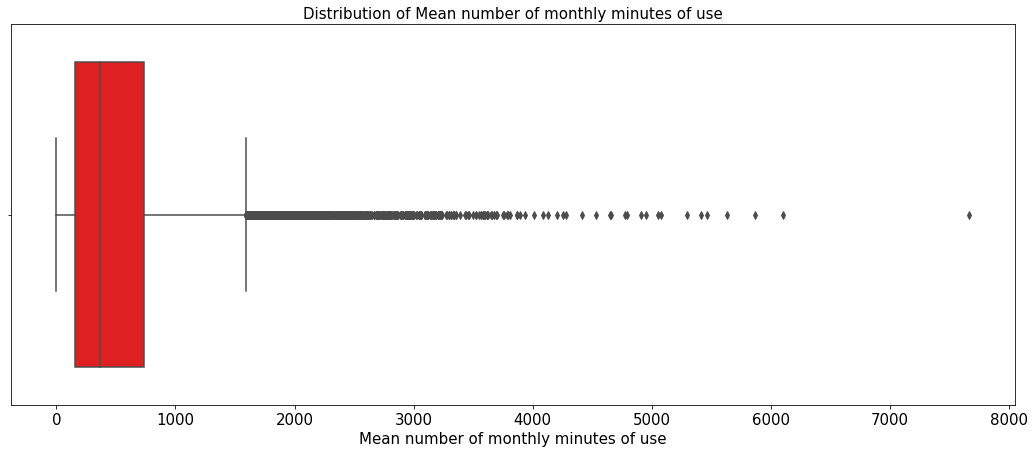

In [4]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "mou_Mean", data = df, color = "red")
plt.title("Distribution of Mean number of monthly minutes of use", size = 15)
plt.xlabel("Mean number of monthly minutes of use", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean total monthly recurring charge**

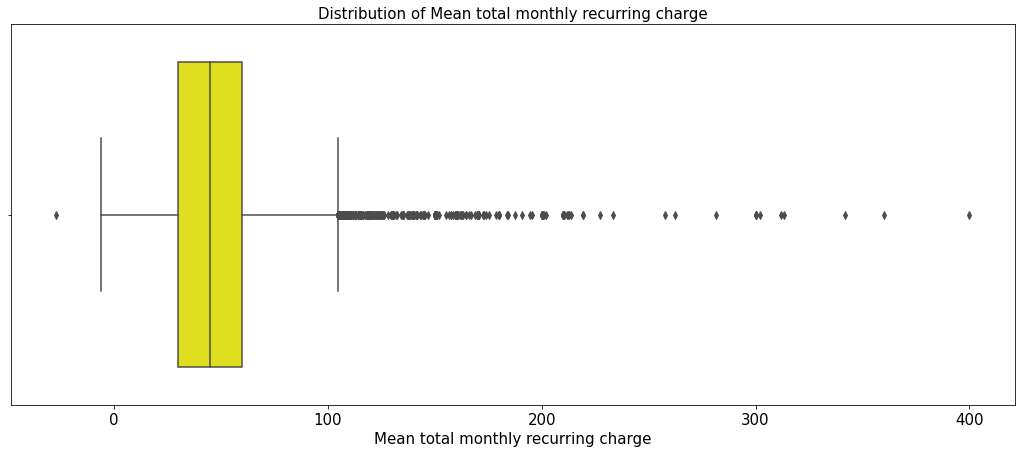

In [5]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "totmrc_Mean", data = df, color = "yellow")
plt.title("Distribution of Mean total monthly recurring charge", size = 15)
plt.xlabel("Mean total monthly recurring charge", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of revenue (charge amount)**

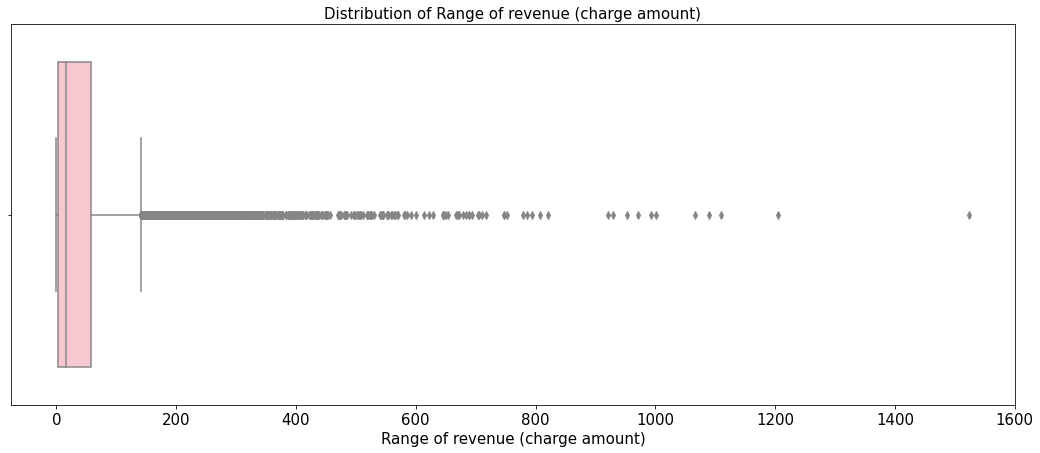

In [6]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "rev_Range", data = df, color = "pink")
plt.title("Distribution of Range of revenue (charge amount)", size = 15)
plt.xlabel("Range of revenue (charge amount)", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of number of minutes of use**

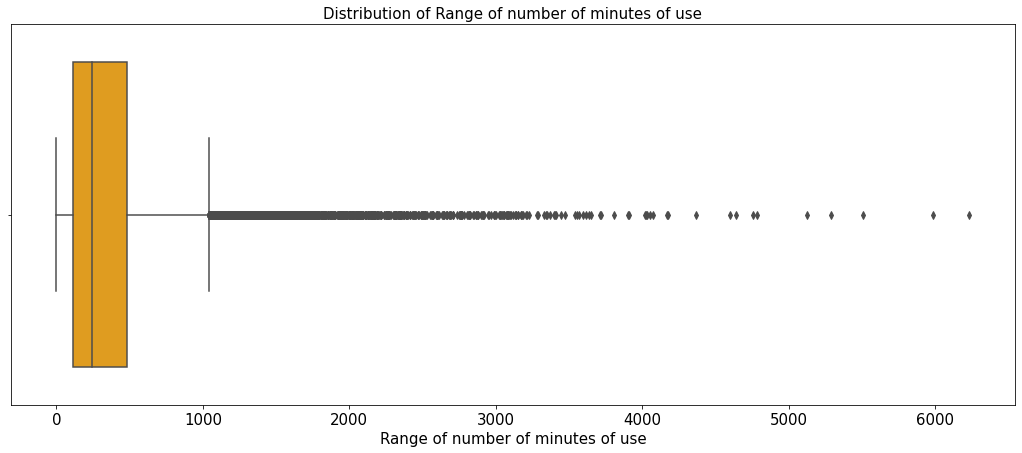

In [7]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "mou_Range", data = df, color = "orange")
plt.title("Distribution of Range of number of minutes of use", size = 15)
plt.xlabel("Range of number of minutes of use", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Percentage change in monthly minutes of use vs previous three month average**

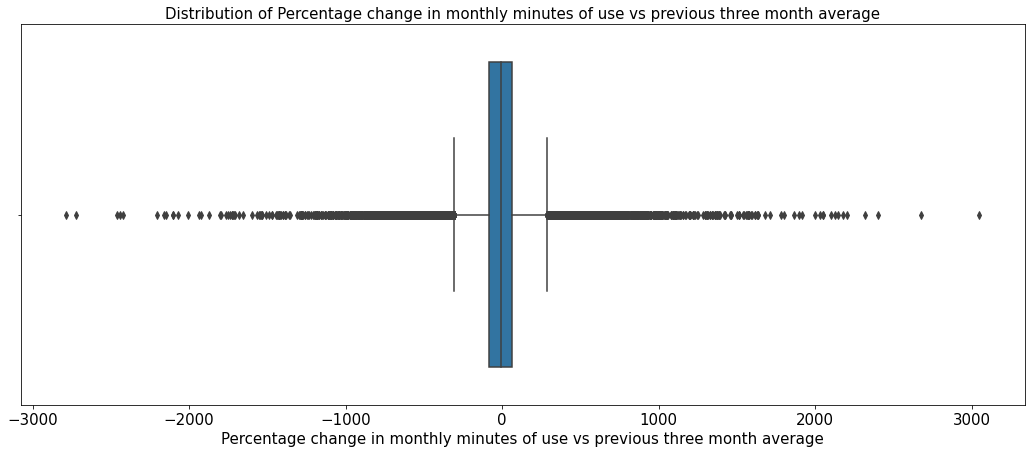

In [8]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "change_mou", data = df)
plt.title("Distribution of Percentage change in monthly minutes of use vs previous three month average", size = 15)
plt.xlabel("Percentage change in monthly minutes of use vs previous three month average", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of dropped or blocked calls**

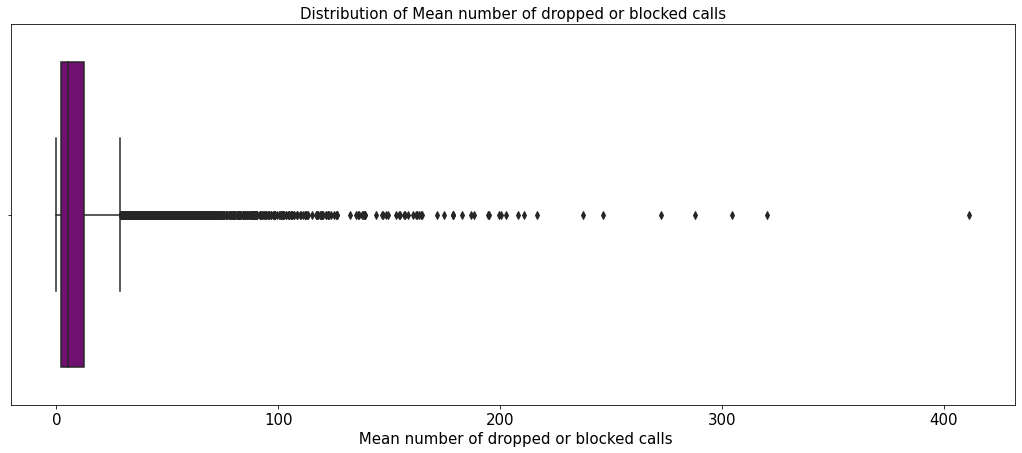

In [9]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "drop_blk_Mean", data = df, color = "purple")
plt.title("Distribution of Mean number of dropped or blocked calls", size = 15)
plt.xlabel(" Mean number of dropped or blocked calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of number of dropped (failed) voice calls**

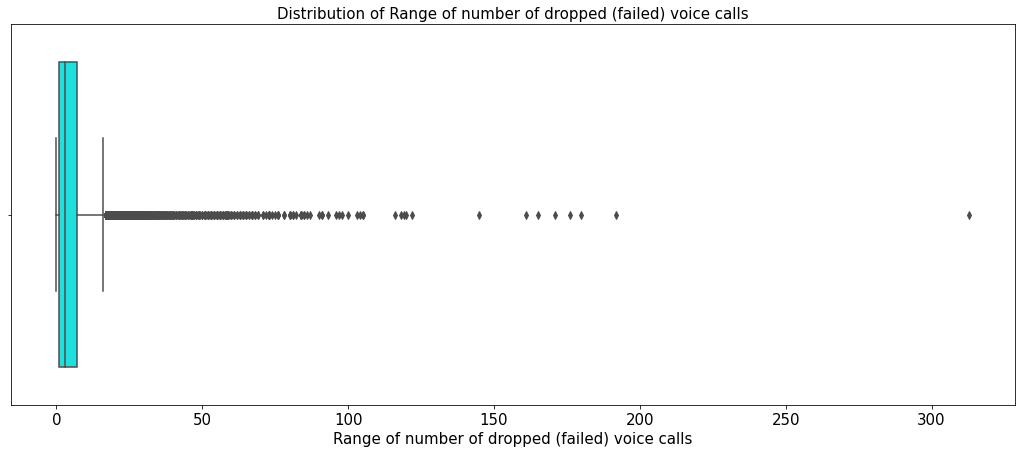

In [10]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "drop_vce_Range", data = df, color = "cyan")
plt.title("Distribution of Range of number of dropped (failed) voice calls", size = 15)
plt.xlabel("Range of number of dropped (failed) voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of number of outbound wireless to wireless voice calls**

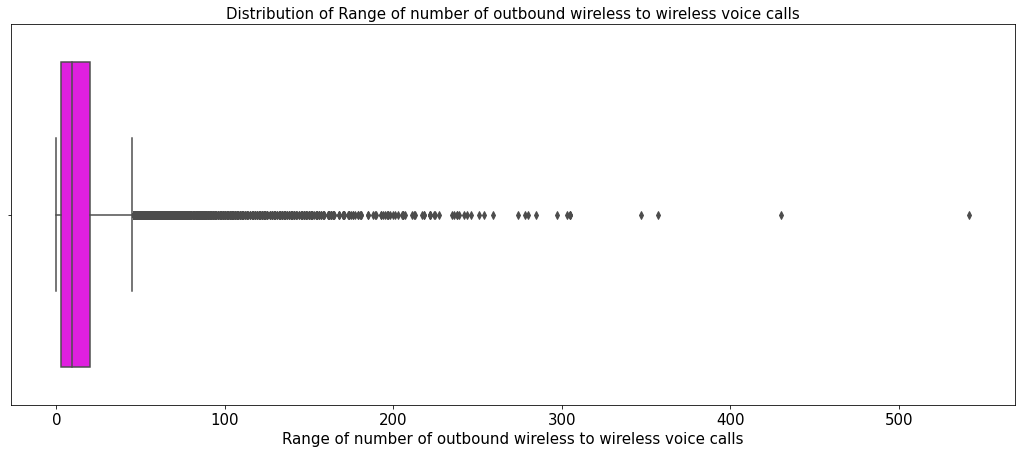

In [11]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "owylis_vce_Range", data = df, color = "magenta")
plt.title("Distribution of Range of number of outbound wireless to wireless voice calls", size = 15)
plt.xlabel("Range of number of outbound wireless to wireless voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of unrounded minutes of use of off-peak voice calls**

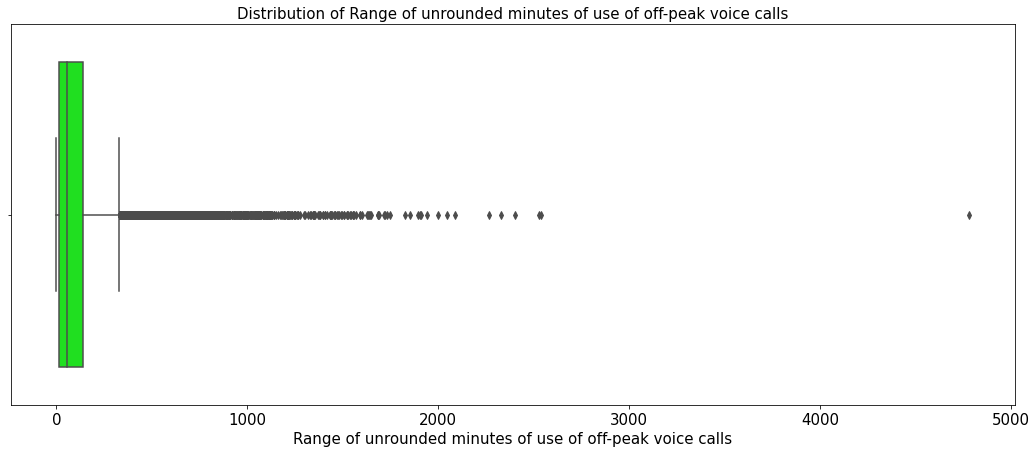

In [12]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "mou_opkv_Range", data = df, color = "lime")
plt.title("Distribution of Range of unrounded minutes of use of off-peak voice calls", size = 15)
plt.xlabel("Range of unrounded minutes of use of off-peak voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Total number of months in service**

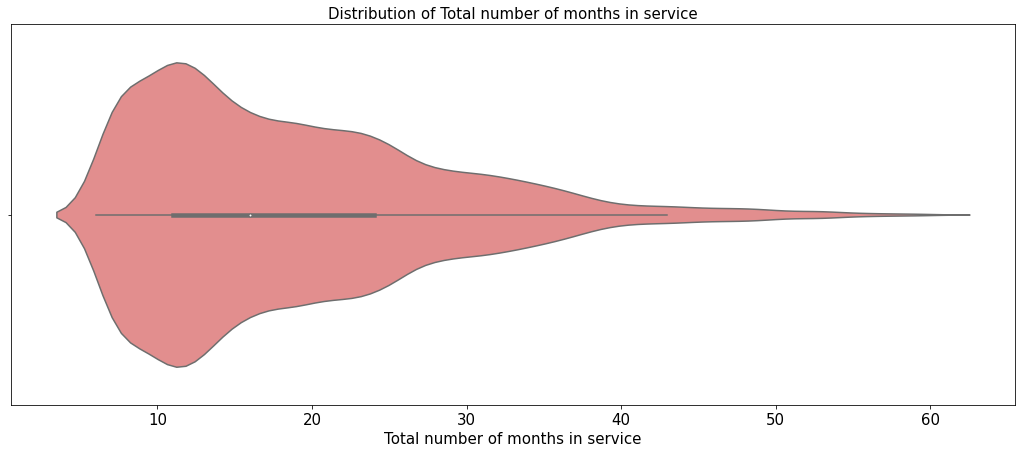

In [13]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "months", data = df, color = "lightcoral")
plt.title("Distribution of Total number of months in service", size = 15)
plt.xlabel("Total number of months in service", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Total number of calls over the life of the customer**

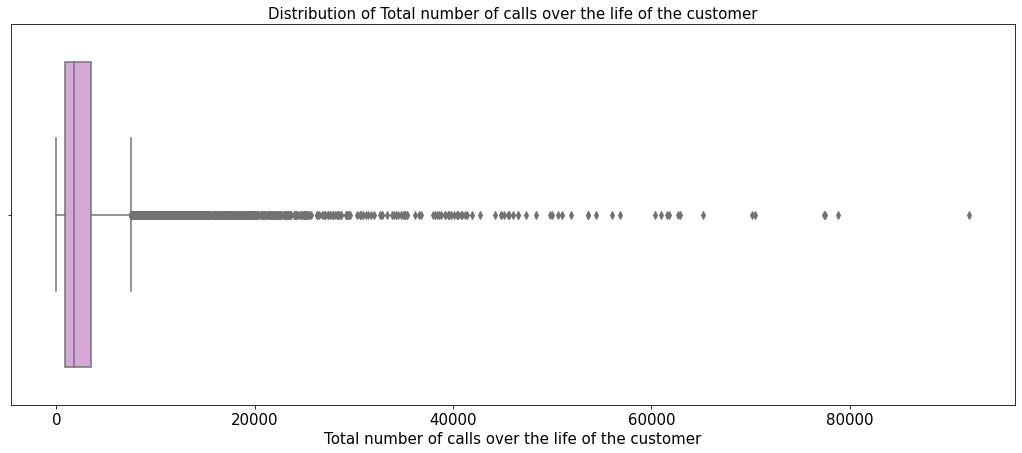

In [14]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "totcalls", data = df, color = "plum")
plt.title("Distribution of Total number of calls over the life of the customer", size = 15)
plt.xlabel("Total number of calls over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Income**

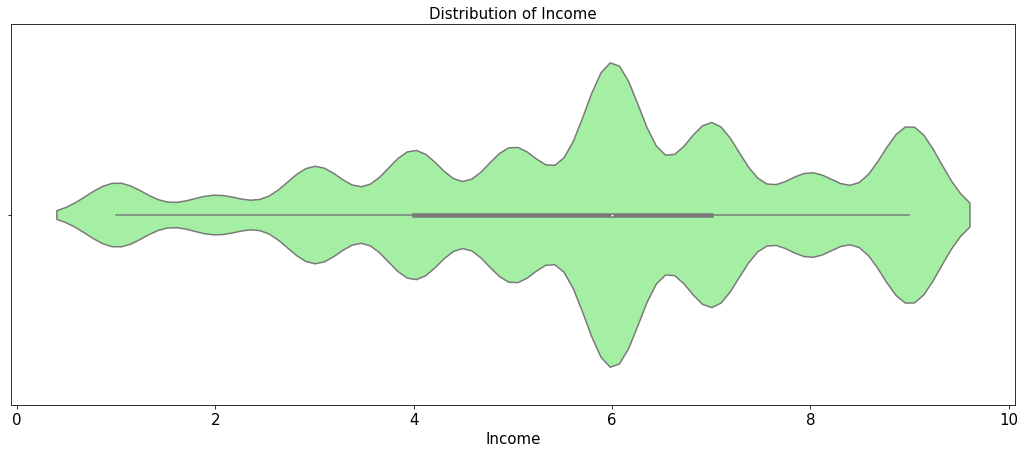

In [15]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "income", data = df, color = "palegreen")
plt.title("Distribution of Income", size = 15)
plt.xlabel("Income", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Number of days (age) of current equipment**

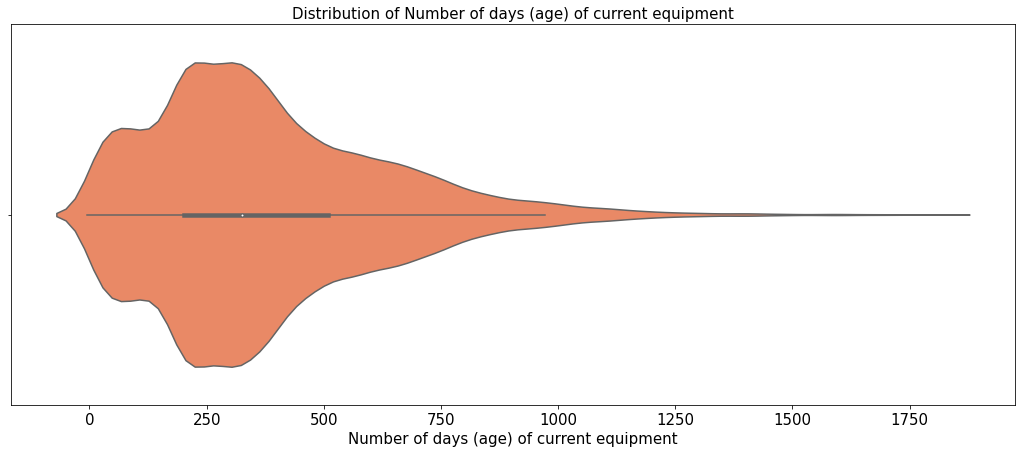

In [16]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "eqpdays", data = df, color = "coral")
plt.title("Distribution of Number of days (age) of current equipment", size = 15)
plt.xlabel("Number of days (age) of current equipment", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of customer care calls**

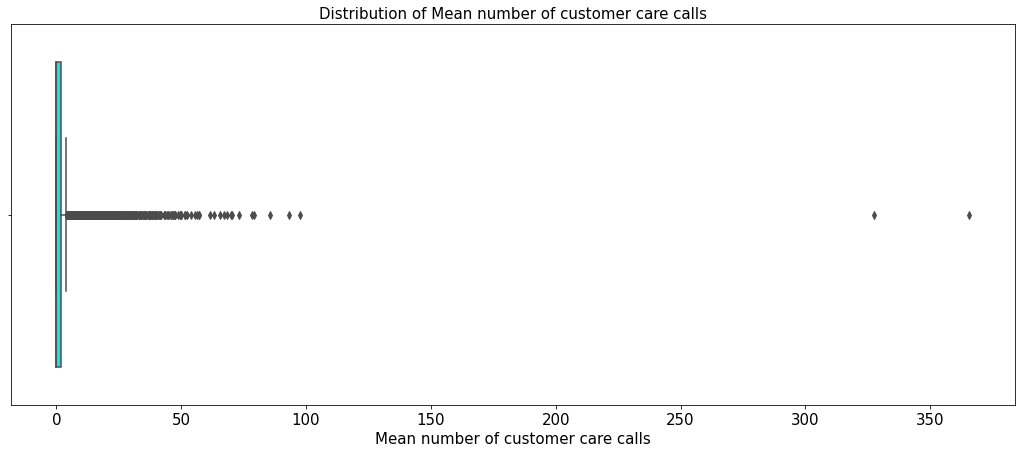

In [17]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "custcare_Mean", data = df, color = "aqua")
plt.title("Distribution of Mean number of customer care calls", size = 15)
plt.xlabel("Mean number of customer care calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of call waiting calls**

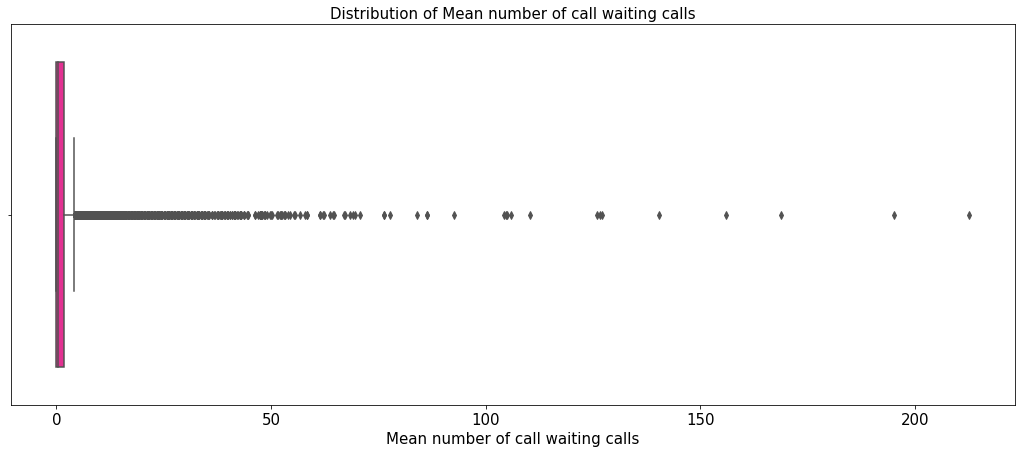

In [18]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "callwait_Mean", data = df, color = "deeppink")
plt.title("Distribution of Mean number of call waiting calls", size = 15)
plt.xlabel("Mean number of call waiting calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of inbound wireless to wireless voice calls**

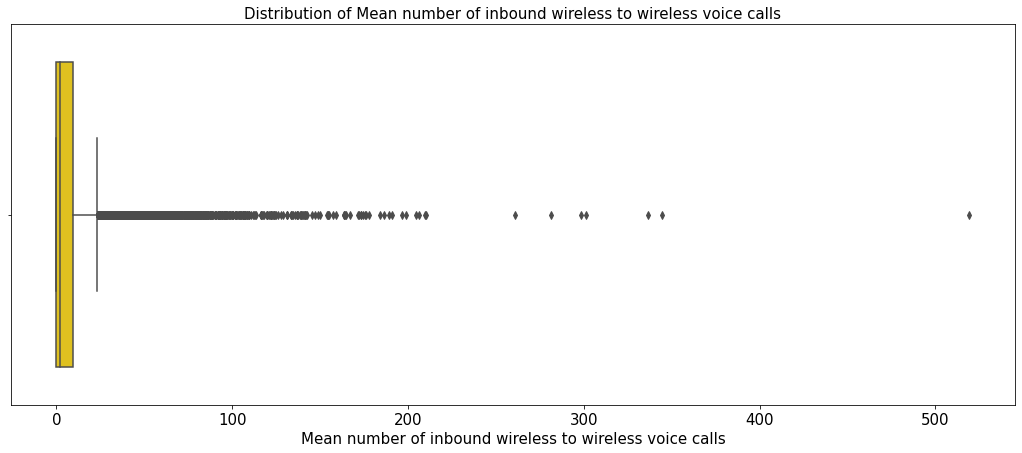

In [19]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "iwylis_vce_Mean", data = df, color = "gold")
plt.title("Distribution of Mean number of inbound wireless to wireless voice calls", size = 15)
plt.xlabel("Mean number of inbound wireless to wireless voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of number of call waiting calls**

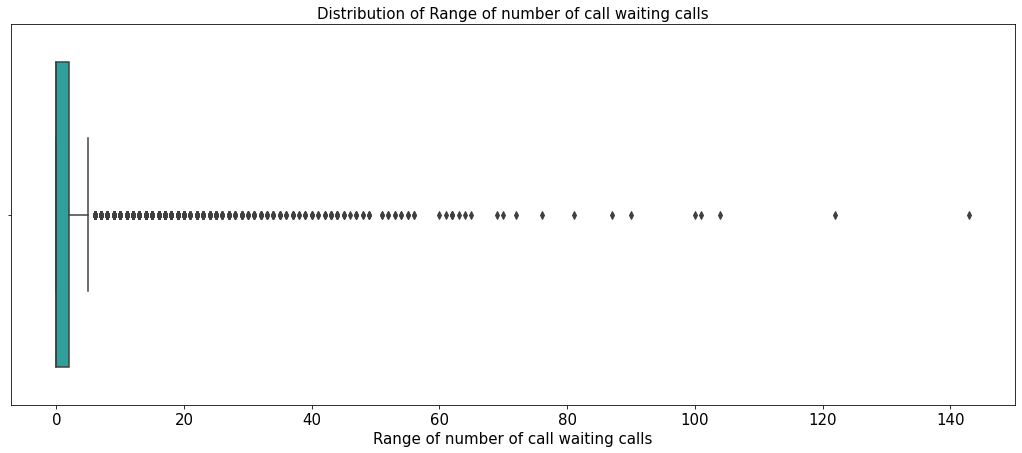

In [20]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "callwait_Range", data = df, color = "lightseagreen")
plt.title("Distribution of Range of number of call waiting calls", size = 15)
plt.xlabel("Range of number of call waiting calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of rounded minutes of use of customer care calls**

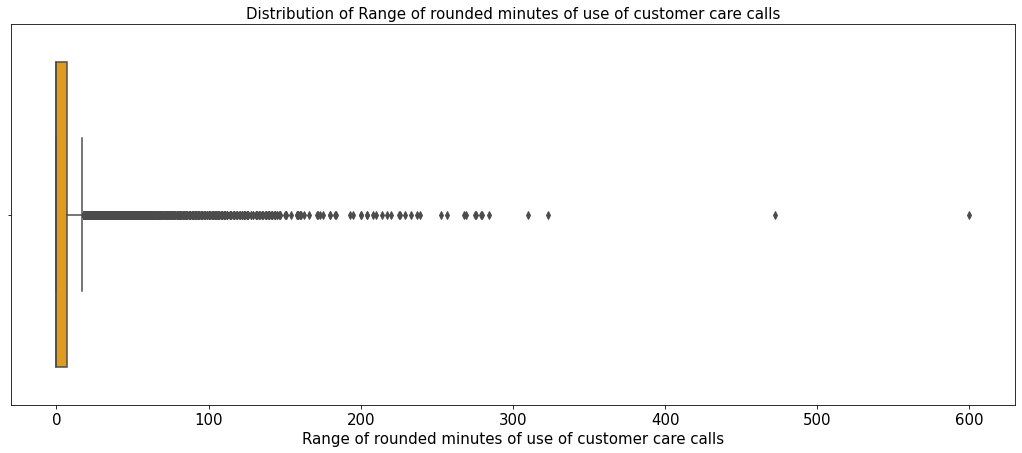

In [21]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ccrndmou_Range", data = df, color = "orange")
plt.title("Distribution of Range of rounded minutes of use of customer care calls", size = 15)
plt.xlabel("Range of rounded minutes of use of customer care calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Billing adjusted total number of calls over the life of the customer**

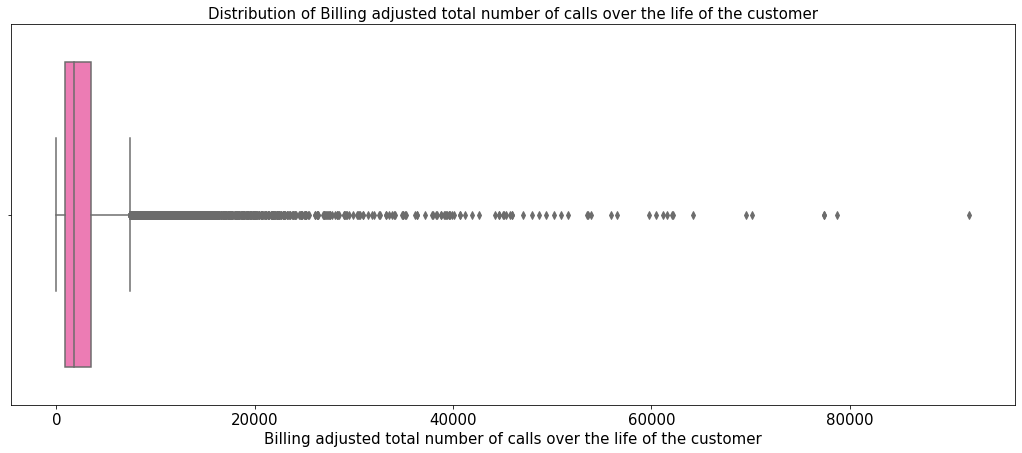

In [22]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "adjqty", data = df, color = "hotpink")
plt.title("Distribution of Billing adjusted total number of calls over the life of the customer", size = 15)
plt.xlabel("Billing adjusted total number of calls over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean overage revenue**

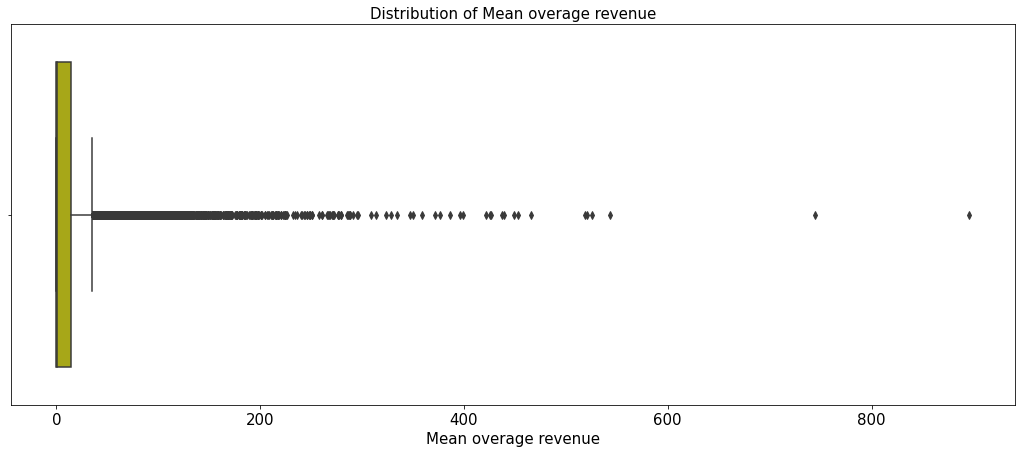

In [23]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ovrrev_Mean", data = df, color = "y")
plt.title("Distribution of Mean overage revenue", size = 15)
plt.xlabel("Mean overage revenue", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean monthly revenue (charge amount)**

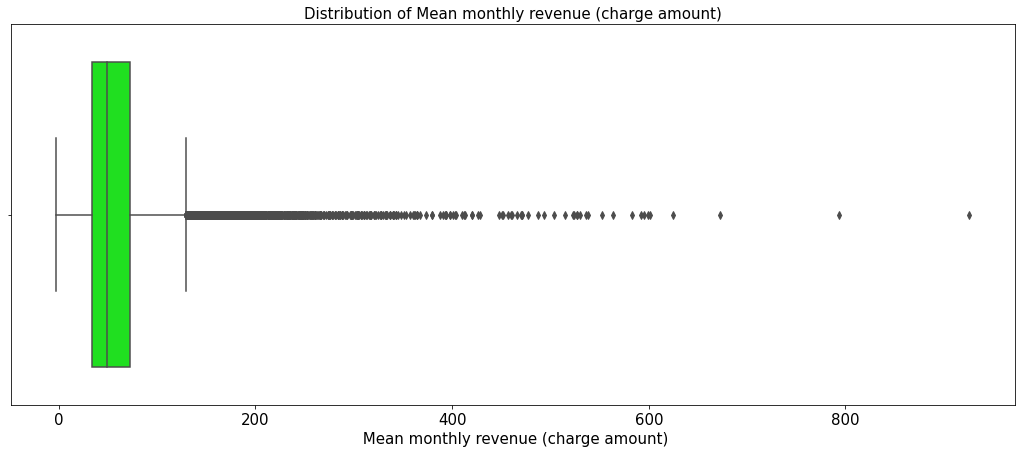

In [24]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "rev_Mean", data = df, color = "lime")
plt.title("Distribution of Mean monthly revenue (charge amount)", size = 15)
plt.xlabel(" Mean monthly revenue (charge amount)", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean overage minutes of use**

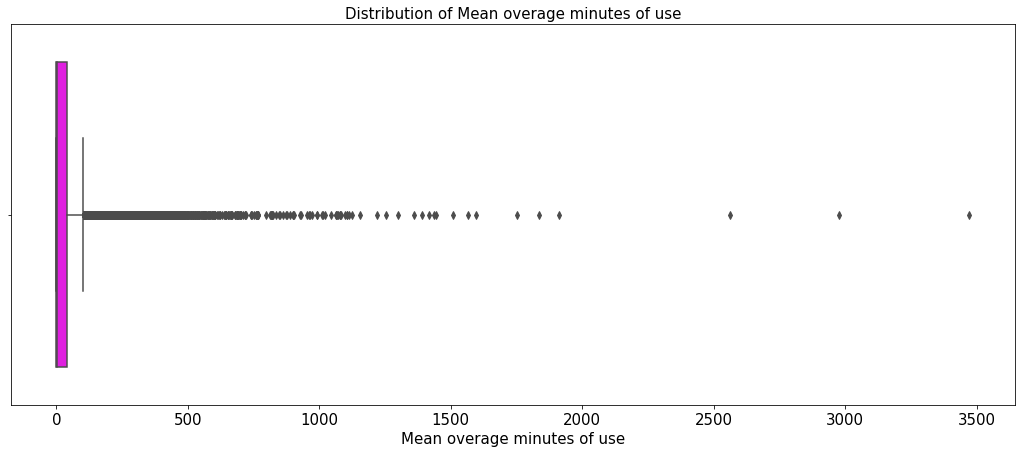

In [25]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "ovrmou_Mean", data = df, color = "magenta")
plt.title("Distribution of Mean overage minutes of use", size = 15)
plt.xlabel("Mean overage minutes of use", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of completed voice calls**

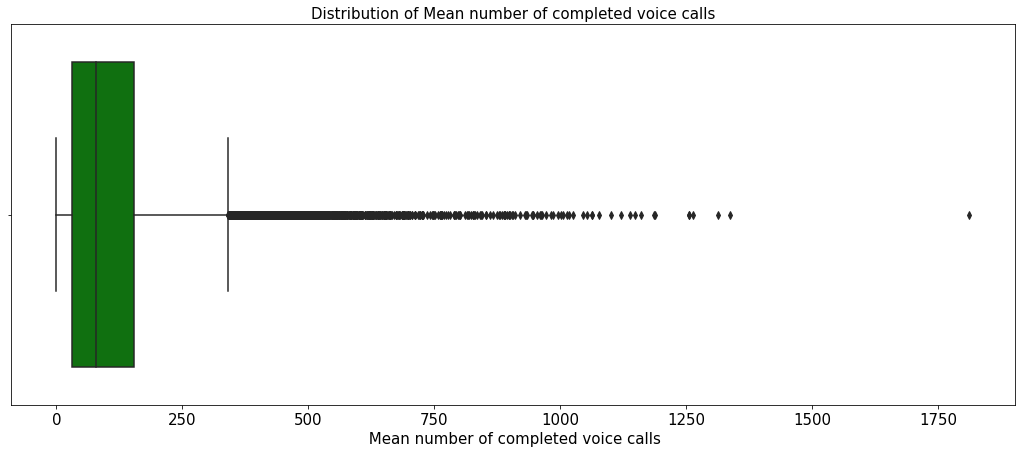

In [26]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "comp_vce_Mean", data = df, color = "green")
plt.title("Distribution of Mean number of completed voice calls", size = 15)
plt.xlabel(" Mean number of completed voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of attempted voice calls placed**

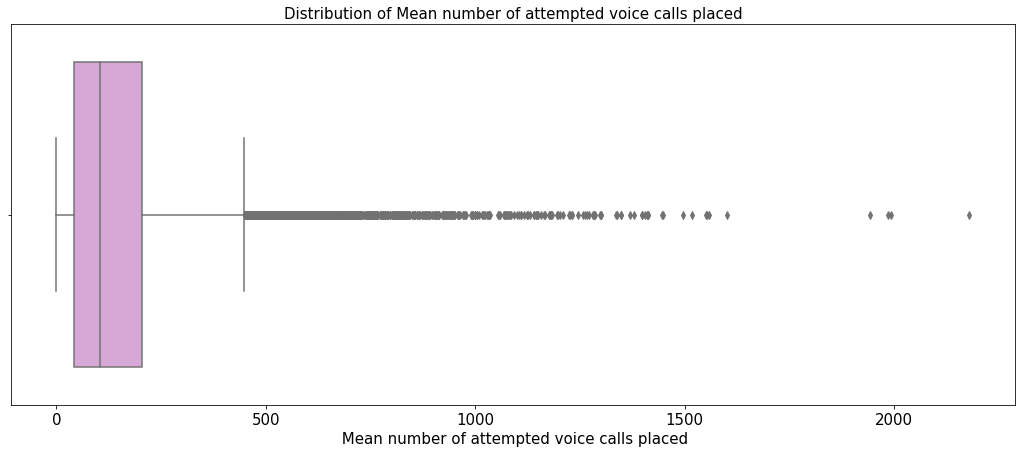

In [27]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "plcd_vce_Mean", data = df, color = "plum")
plt.title("Distribution of Mean number of attempted voice calls placed", size = 15)
plt.xlabel(" Mean number of attempted voice calls placed", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly minutes of use over the previous three months**

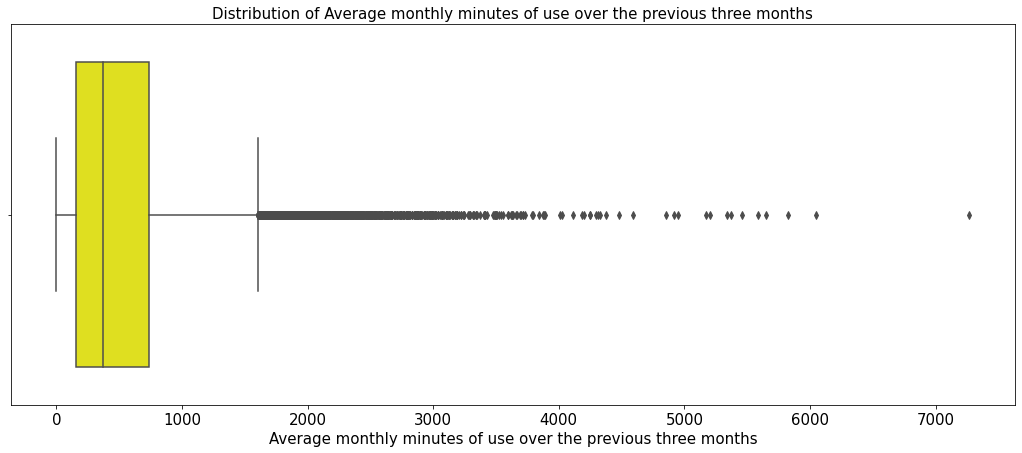

In [28]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avg3mou", data = df, color = "yellow")
plt.title("Distribution of Average monthly minutes of use over the previous three months", size = 15)
plt.xlabel("Average monthly minutes of use over the previous three months", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly minutes of use over the life of the customer**

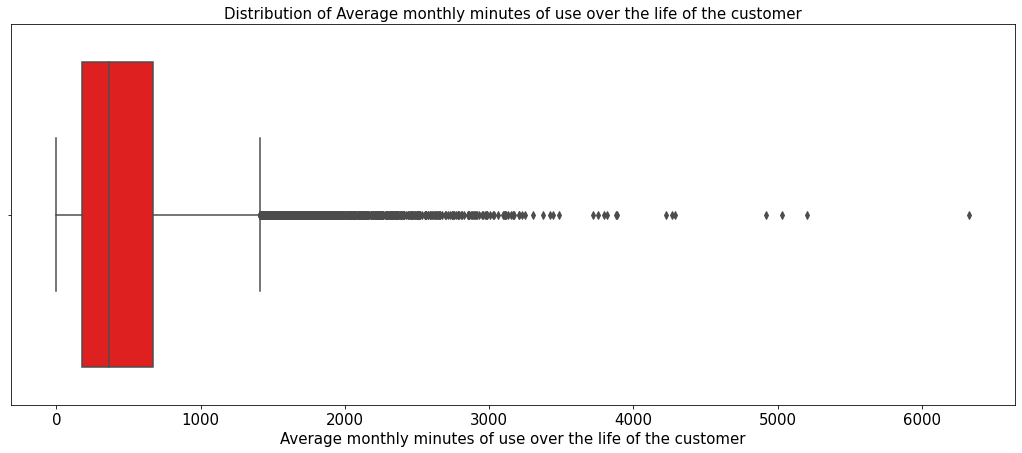

In [29]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avgmou", data = df, color = "red")
plt.title("Distribution of Average monthly minutes of use over the life of the customer", size = 15)
plt.xlabel("Average monthly minutes of use over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly number of calls over the previous three months**

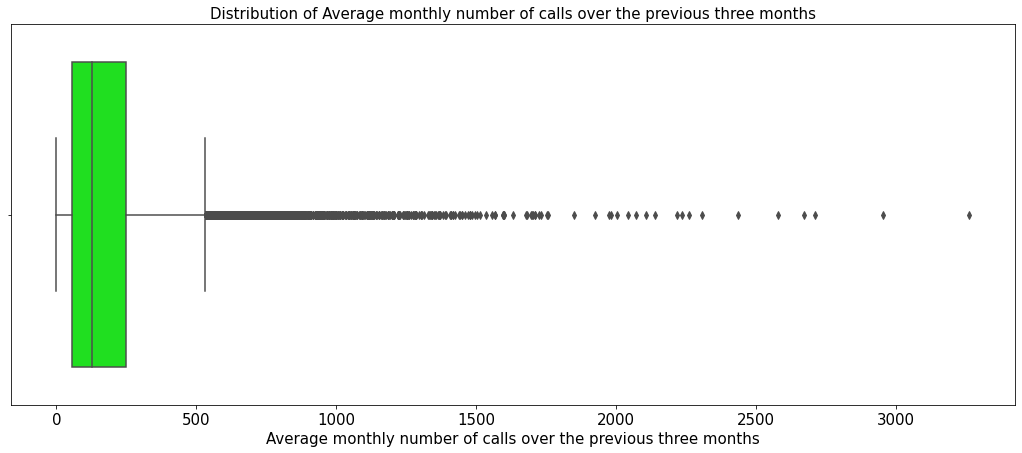

In [30]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avg3qty", data = df, color = "lime")
plt.title("Distribution of Average monthly number of calls over the previous three months", size = 15)
plt.xlabel("Average monthly number of calls over the previous three months", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly number of calls over the life of the customer**

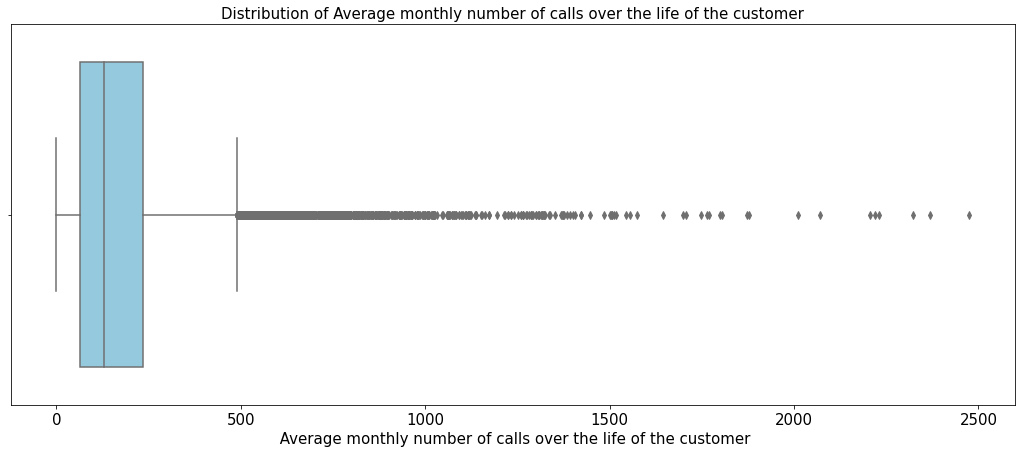

In [31]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avgqty", data = df, color = "skyblue")
plt.title("Distribution of Average monthly number of calls over the life of the customer", size = 15)
plt.xlabel(" Average monthly number of calls over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly minutes of use over the previous six months**

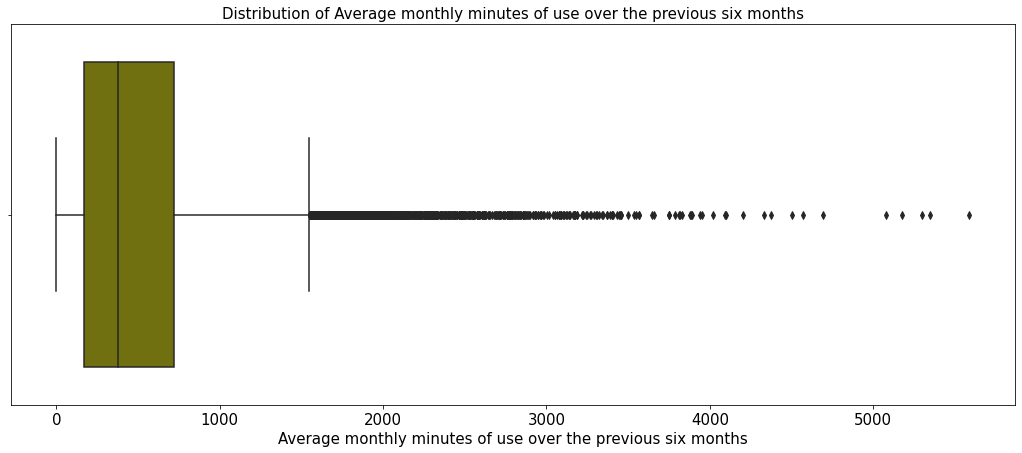

In [32]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avg6mou", data = df, color = "olive")
plt.title("Distribution of Average monthly minutes of use over the previous six months", size = 15)
plt.xlabel("Average monthly minutes of use over the previous six months", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly number of calls over the previous six months**

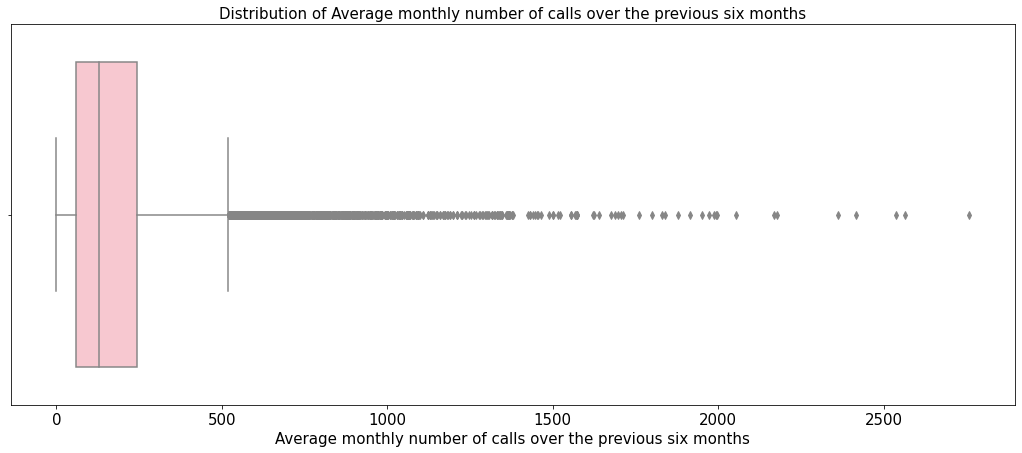

In [33]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avg6qty", data = df, color = "pink")
plt.title("Distribution of Average monthly number of calls over the previous six months", size = 15)
plt.xlabel("Average monthly number of calls over the previous six months", size = 15)
plt.xticks(size = 15)
plt.show()

**Top 20 Frequencies of Credit class code**

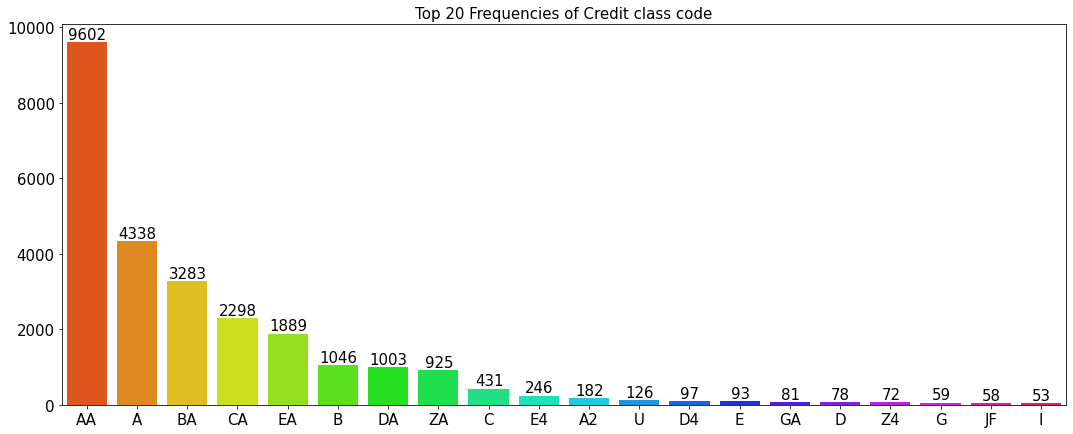

In [34]:
dcc = df["crclscod"].value_counts().to_frame().reset_index()
dcc.columns = ["Credit class code", "Frequency"]
dcc = dcc[:20]

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Credit class code", y = "Frequency", data = dcc, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 20 Frequencies of Credit class code", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Account spending limit**

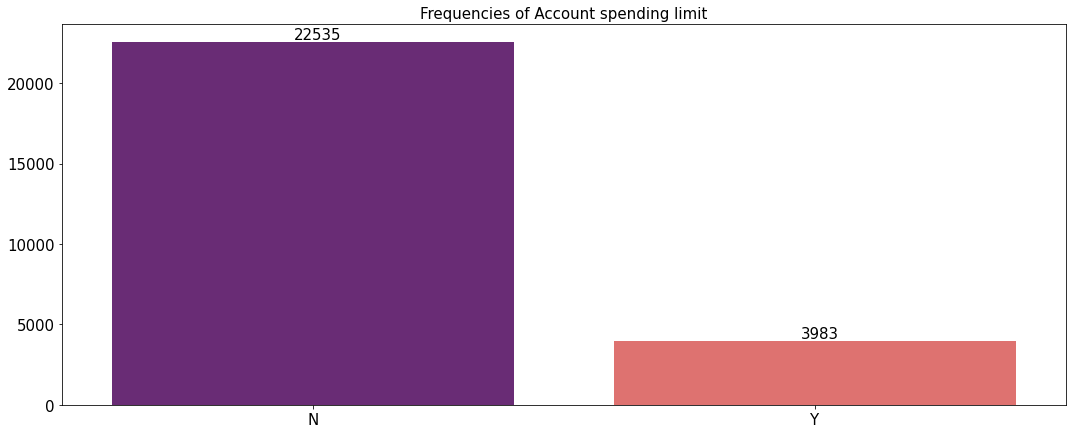

In [35]:
asl = df["asl_flag"].value_counts().to_frame().reset_index()
asl.columns = ["Account spending limit", "Frequency"]
asl

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Account spending limit", y = "Frequency", data = asl, palette = "magma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequencies of Account spending limit", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequencies of Social group letter only**

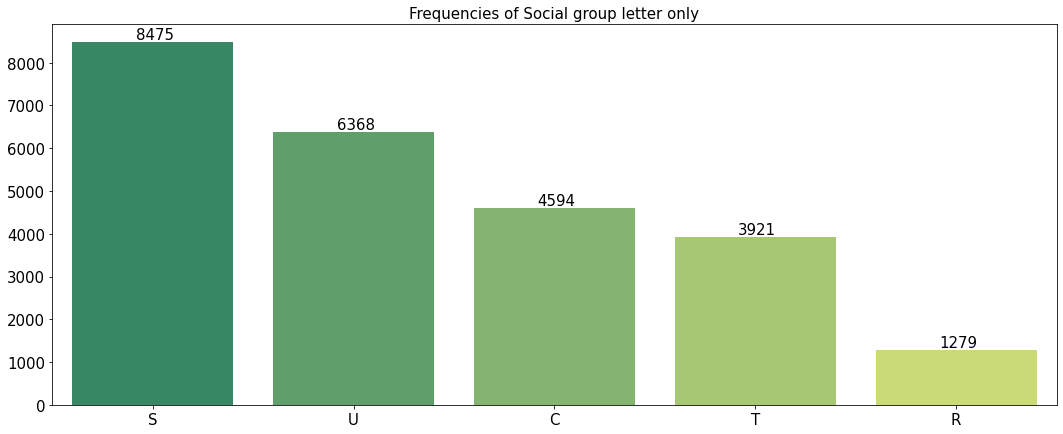

In [36]:
sgl = df["prizm_social_one"].value_counts().to_frame().reset_index()
sgl.columns = ["Social group letter", "Frequency"]
sgl

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Social group letter", y = "Frequency", data = sgl, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequencies of Social group letter only", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Geographical Area**

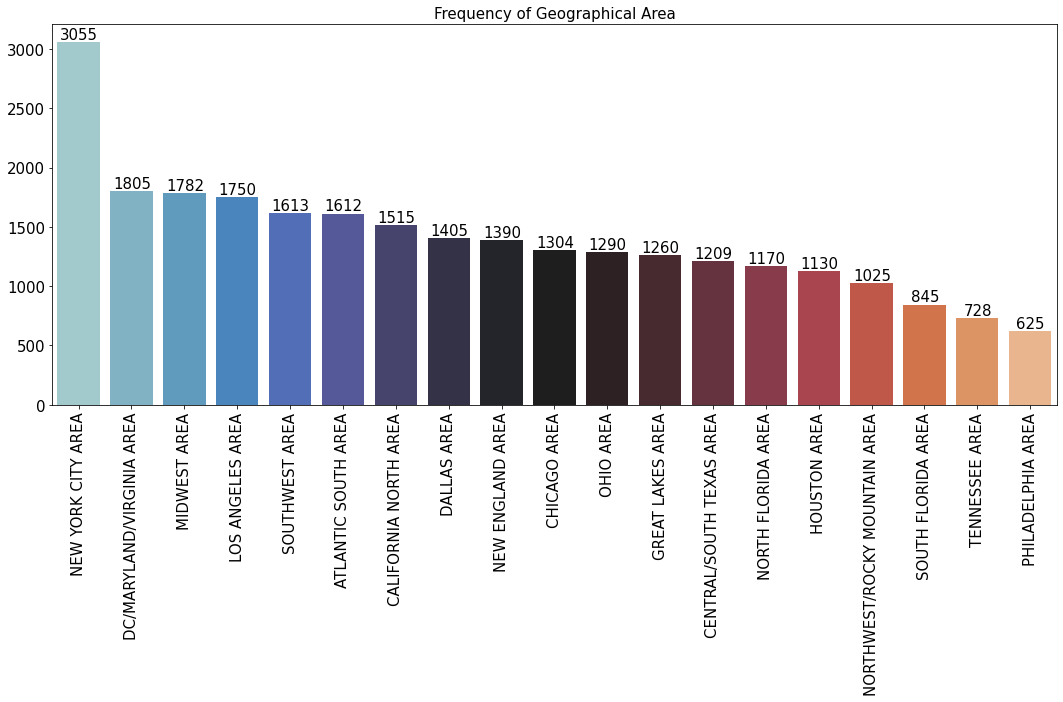

In [37]:
ga = df["area"].value_counts().to_frame().reset_index()
ga.columns = ["Geographical Area", "Frequency"]
ga

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Geographical Area", y = "Frequency", data = ga, palette = "icefire")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Geographical Area", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Handset: refurbished or new**

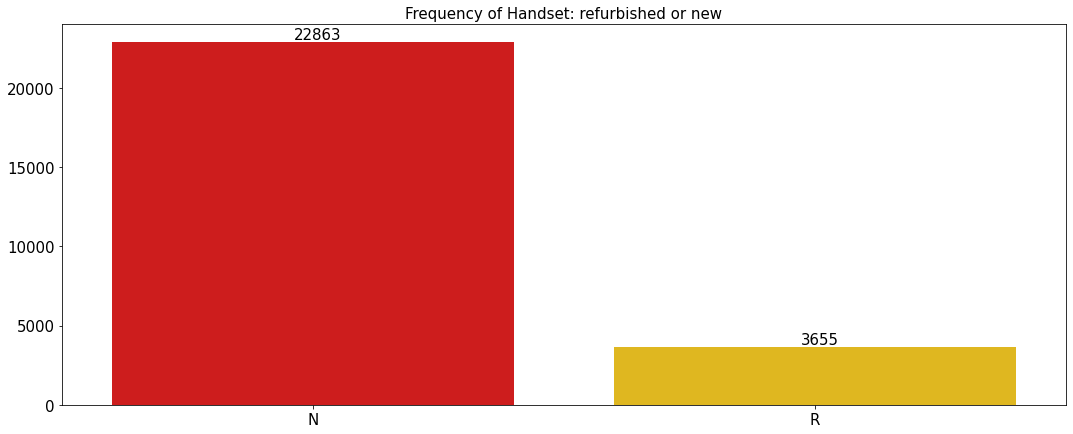

In [38]:
hrn = df["refurb_new"].value_counts().to_frame().reset_index()
hrn.columns = ["Handset", "Frequency"]
hrn

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Handset", y = "Frequency", data = hrn, palette = "hot")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Handset: refurbished or new", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Handset web capability**

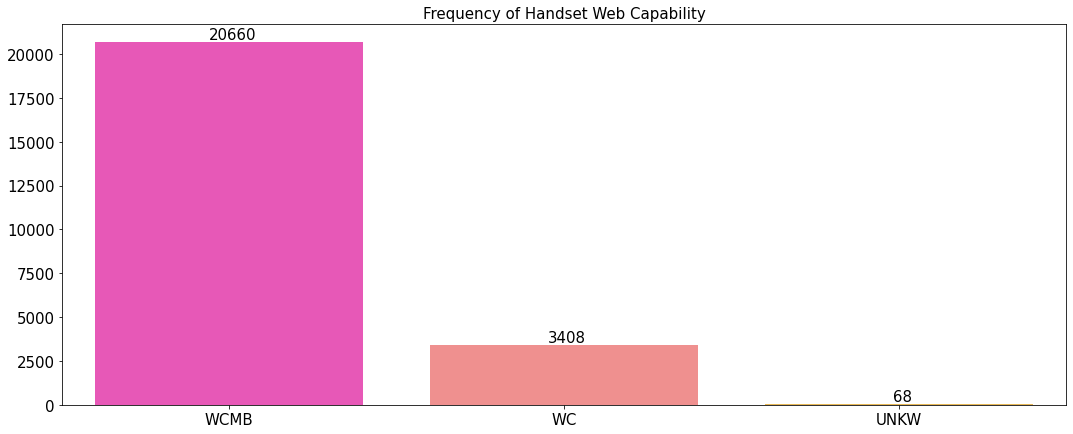

In [39]:
hwc = df["hnd_webcap"].value_counts().to_frame().reset_index()
hwc.columns = ["Handset Web Capability", "Frequency"]
hwc

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Handset Web Capability", y = "Frequency", data = hwc, palette = "spring")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Handset Web Capability", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Marital status**

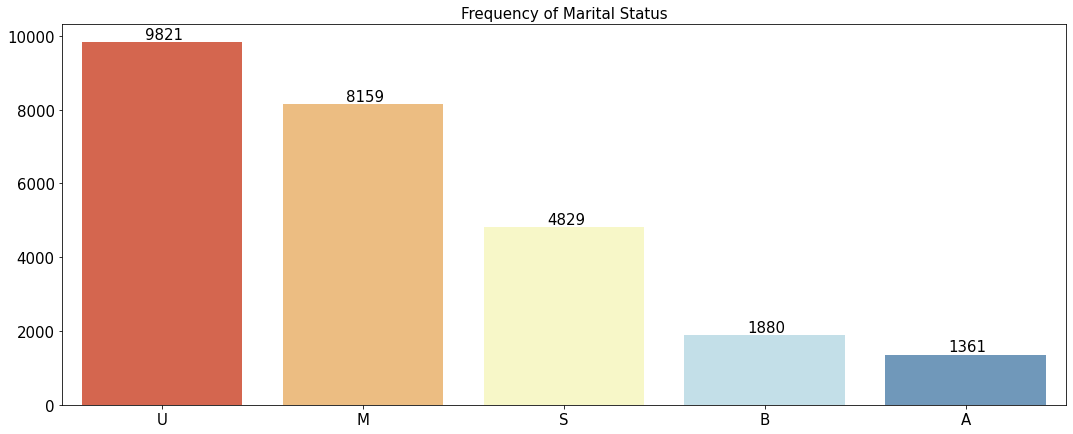

In [40]:
ms = df["marital"].value_counts().to_frame().reset_index()
ms.columns = ["Marital Status", "Frequency"]
ms

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Marital Status", y = "Frequency", data = ms, palette = "RdYlBu")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Marital Status", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Ethnicity roll-up code**

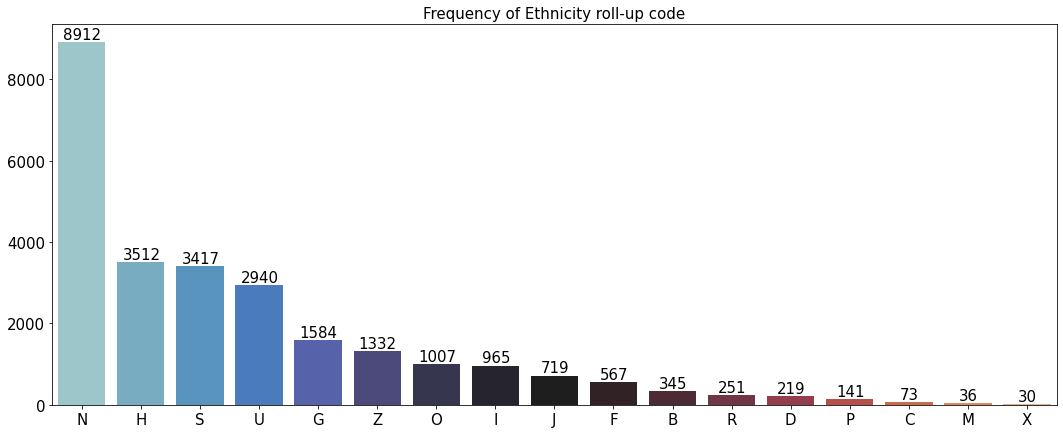

In [41]:
ec = df["ethnic"].value_counts().to_frame().reset_index()
ec.columns = ["Ethnic Code", "Frequency"]
ec

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Ethnic Code", y = "Frequency", data = ec, palette = "icefire")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Ethnicity roll-up code", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Age of first household member**

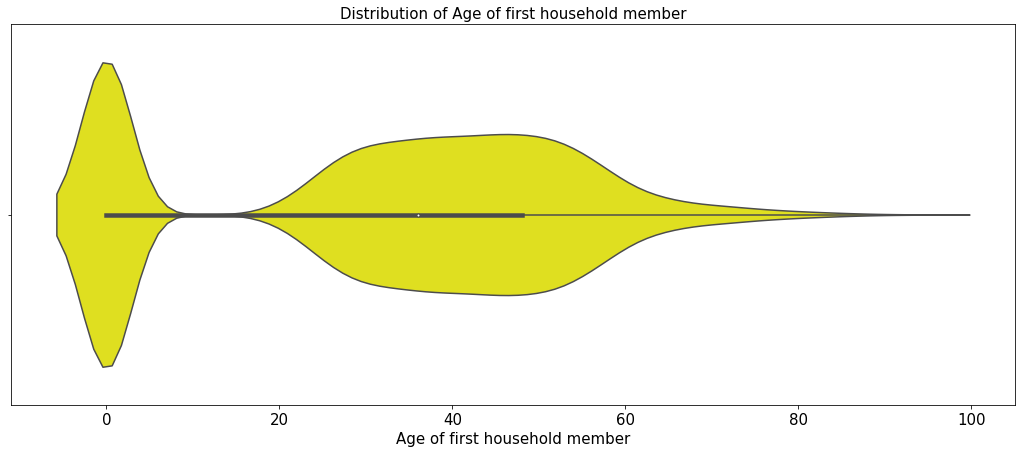

In [42]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "age1", data = df, color = "yellow")
plt.title("Distribution of Age of first household member", size = 15)
plt.xlabel("Age of first household member", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Age of second household member**

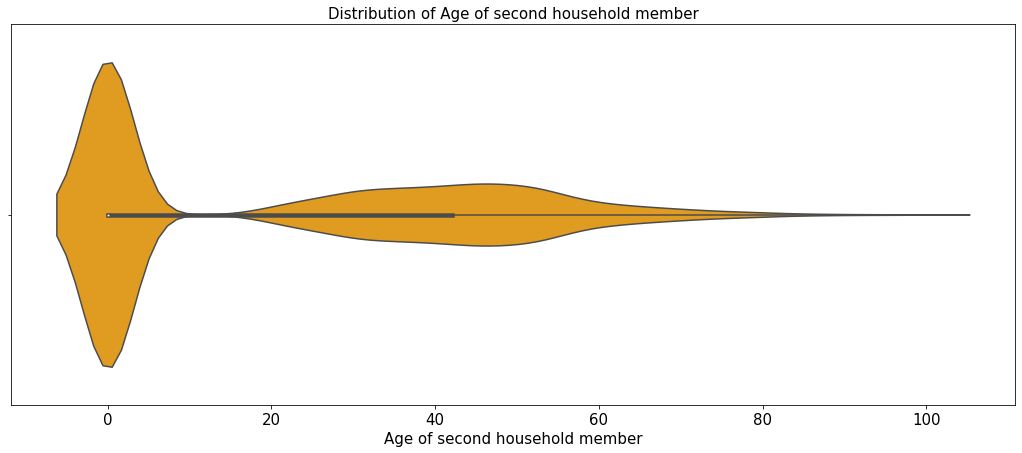

In [43]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "age2", data = df, color = "orange")
plt.title("Distribution of Age of second household member", size = 15)
plt.xlabel("Age of second household member", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Number of models issued**

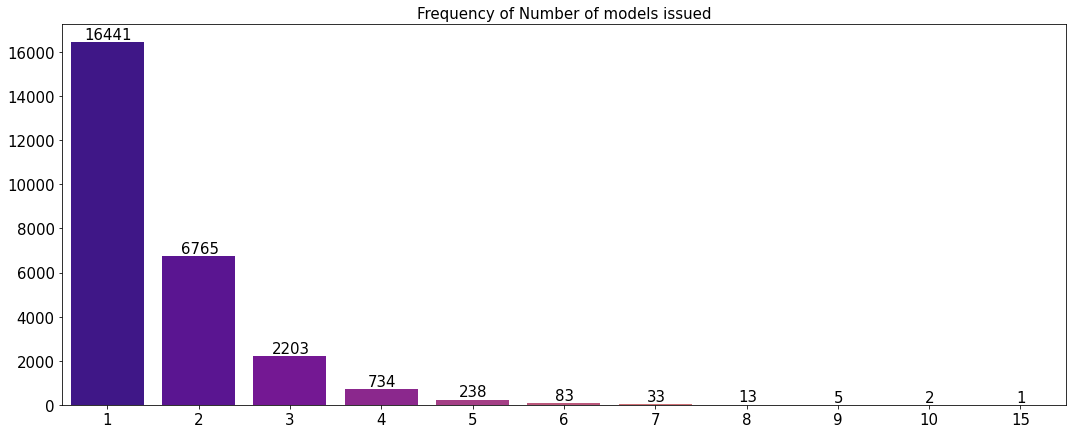

In [44]:
m = df["models"].value_counts().to_frame().reset_index()
m.columns = ["Models", "Frequency"]
m

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Models", y = "Frequency", data = m, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Number of models issued", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Current handset price**

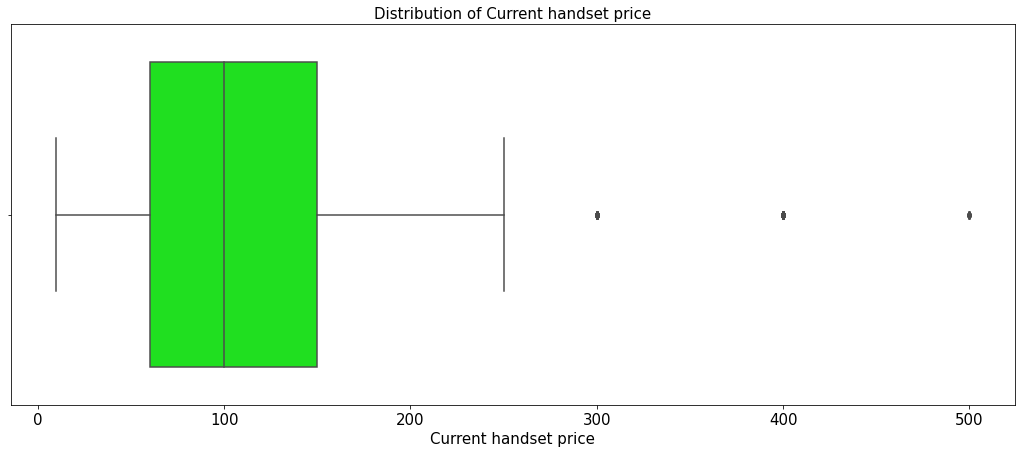

In [45]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "hnd_price", data = df, color = "lime")
plt.title("Distribution of Current handset price", size = 15)
plt.xlabel("Current handset price", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Number of active subscribers in household**

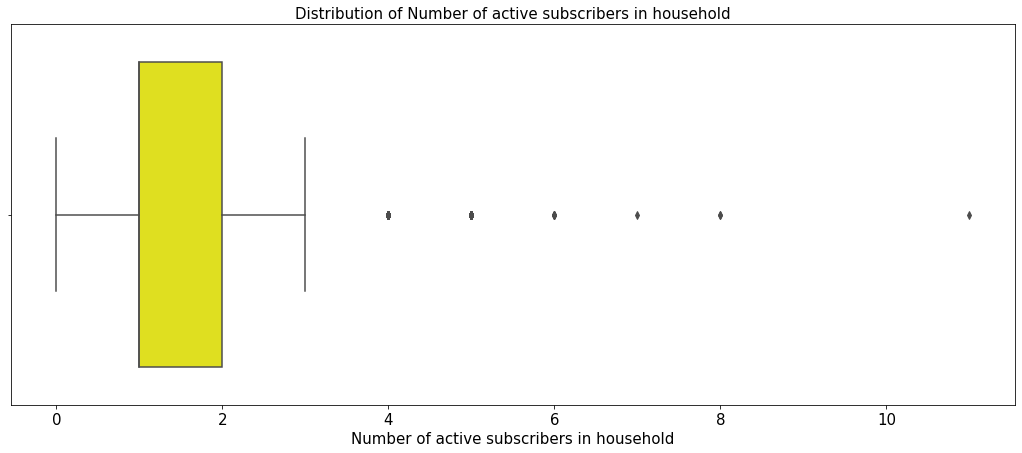

In [46]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "actvsubs", data = df, color = "yellow")
plt.title("Distribution of Number of active subscribers in household", size = 15)
plt.xlabel("Number of active subscribers in household", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Number of unique subscribers in the household**

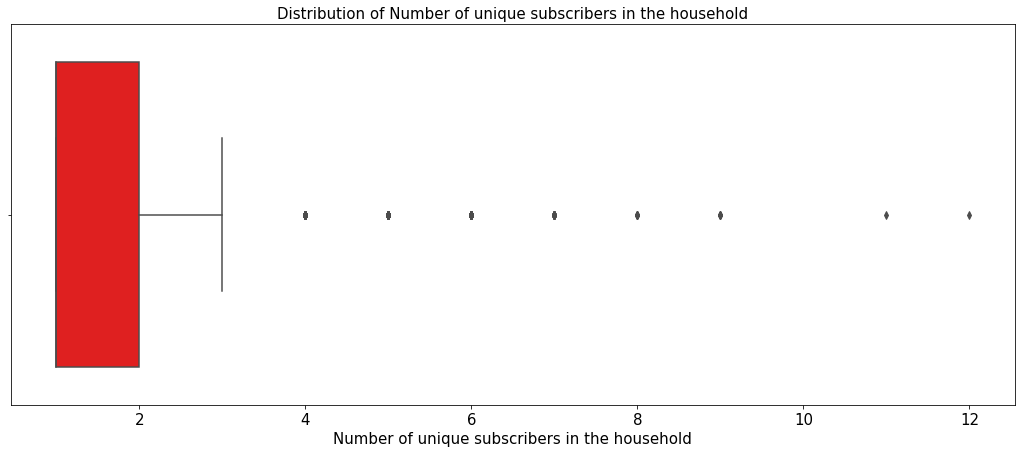

In [47]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "uniqsubs", data = df, color = "red")
plt.title("Distribution of Number of unique subscribers in the household", size = 15)
plt.xlabel("Number of unique subscribers in the household", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Foreign travel dummy variable**

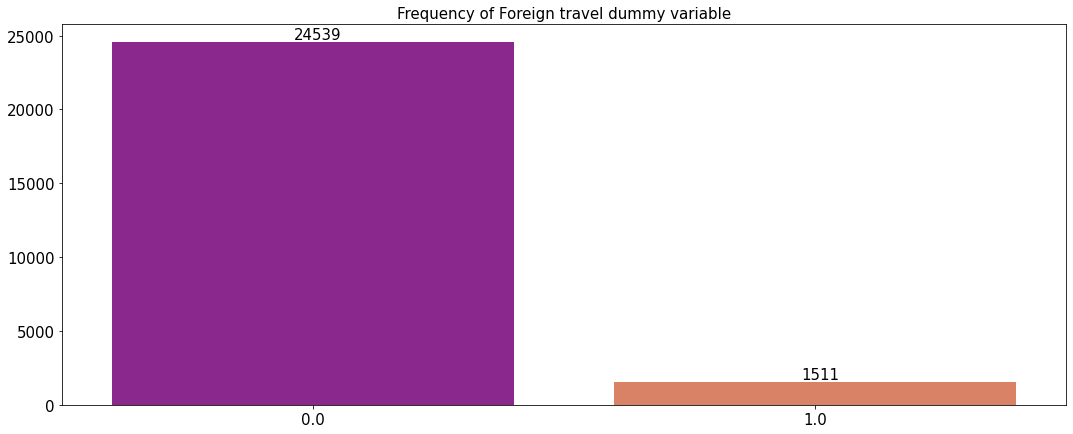

In [48]:
ft = df["forgntvl"].value_counts().to_frame().reset_index()
ft.columns = ["Foreign travel", "Frequency"]
ft

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Foreign travel", y = "Frequency", data = ft, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Foreign travel dummy variable", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Dwelling unit type**

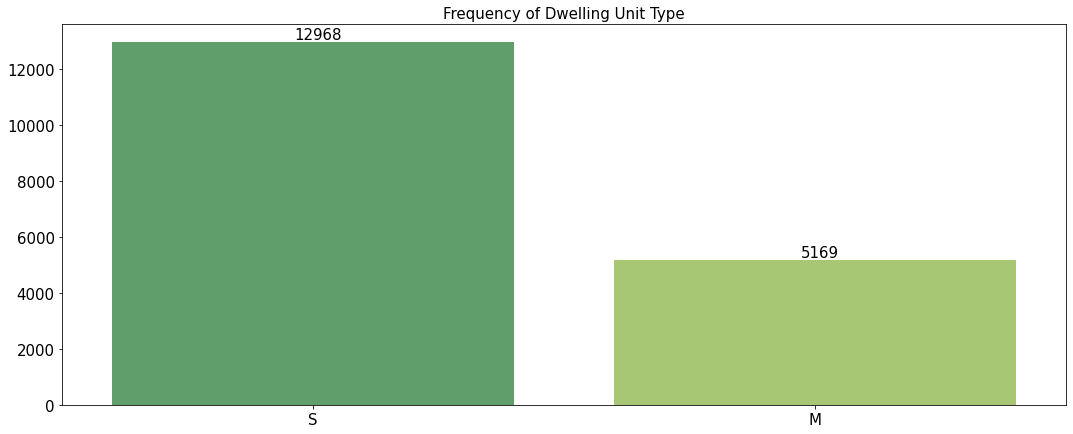

In [49]:
dut = df["dwlltype"].value_counts().to_frame().reset_index()
dut.columns = ["Dwelling Unit Type", "Frequency"]
dut

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Dwelling Unit Type", y = "Frequency", data = dut, palette = "summer")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Dwelling Unit Type", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**requency of Dwelling Size**

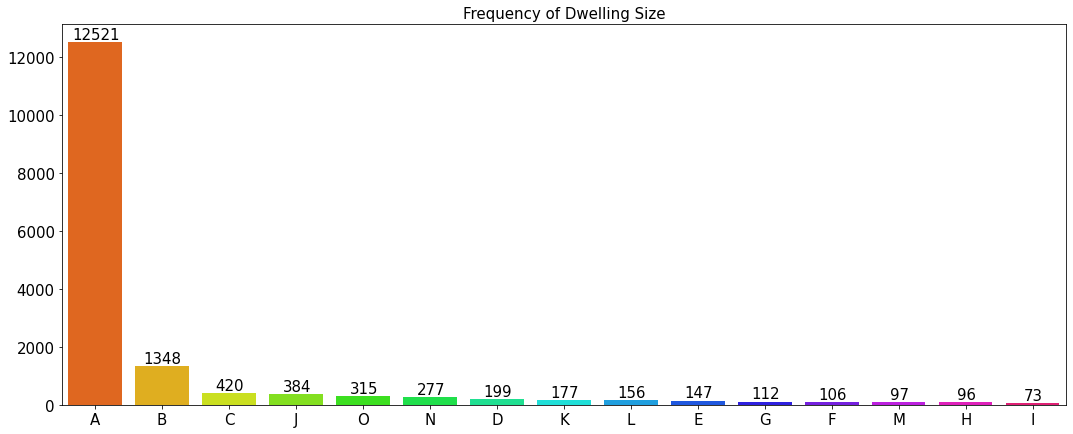

In [50]:
ds = df["dwllsize"].value_counts().to_frame().reset_index()
ds.columns = ["Dwelling Size", "Frequency"]
ds

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Dwelling Size", y = "Frequency", data = ds, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Dwelling Size", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Mail order buyer**

In [51]:
df["mailordr"].value_counts()

B    9508
Name: mailordr, dtype: int64

**Frequency of Occupation of first household member**

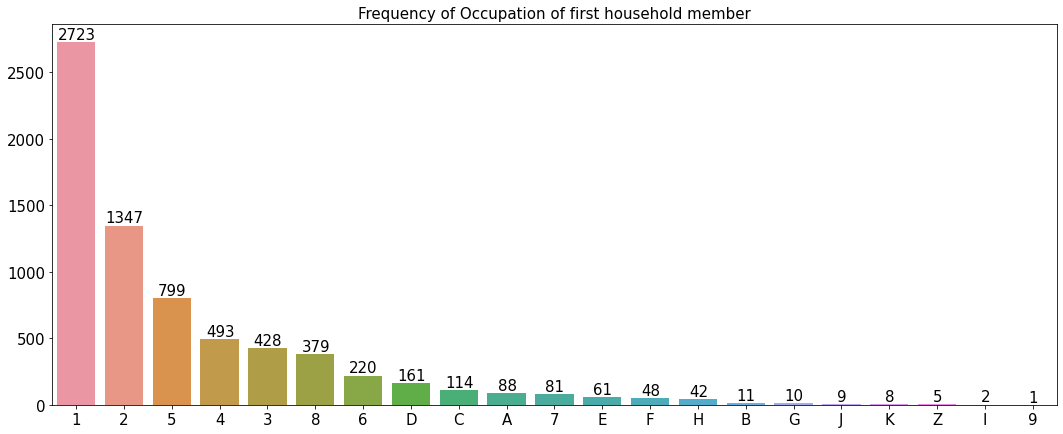

In [52]:
ohm = df["occu1"].value_counts().to_frame().reset_index()
ohm.columns = ["Occupation of first household member", "Frequency"]
ohm

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Occupation of first household member", y = "Frequency", data = ohm)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Occupation of first household member", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Mean number of off-peak data calls**

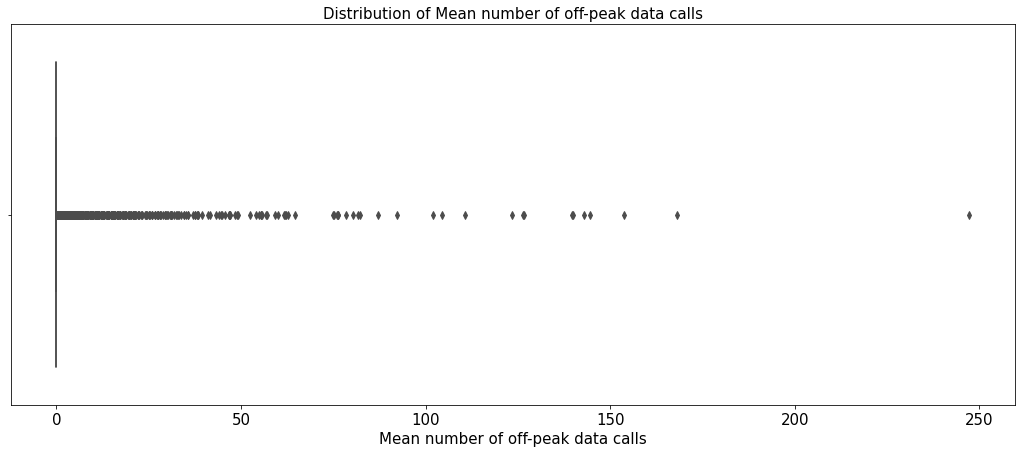

In [53]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "opk_dat_Mean", data = df, color = "cyan")
plt.title("Distribution of Mean number of off-peak data calls", size = 15)
plt.xlabel("Mean number of off-peak data calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Motorcycle indicator**

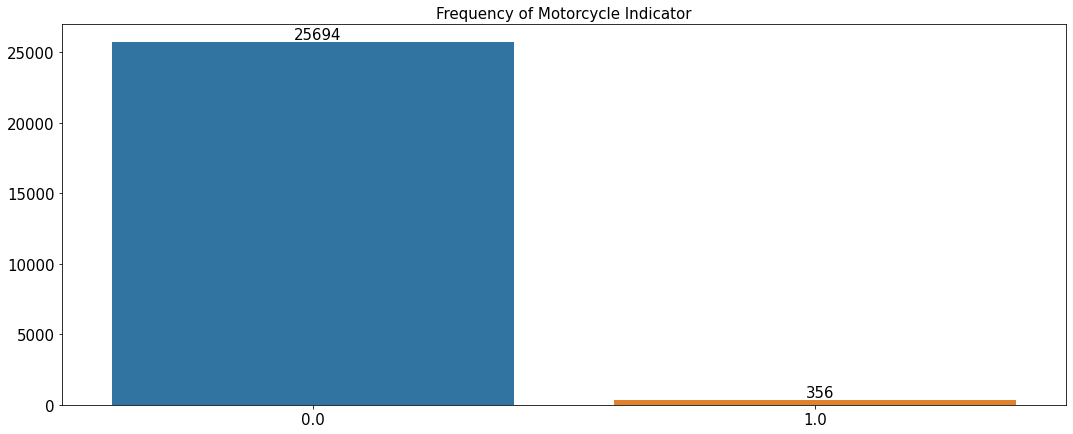

In [54]:
mi = df["mtrcycle"].value_counts().to_frame().reset_index()
mi.columns = ["Motorcycle Indicator", "Frequency"]
mi

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Motorcycle Indicator", y = "Frequency", data = mi)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Motorcycle Indicator", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Known number of vehicles**

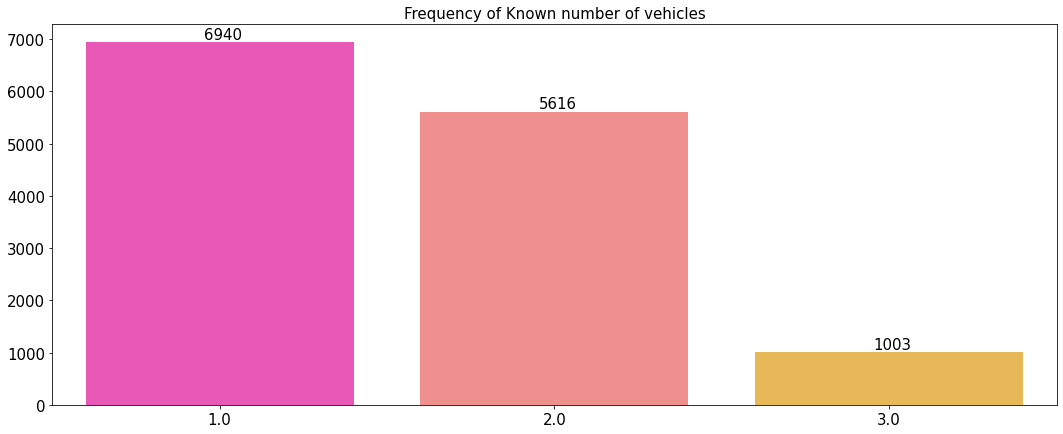

In [55]:
nv = df["numbcars"].value_counts().to_frame().reset_index()
nv.columns = ["Vehicles", "Frequency"]
nv

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Vehicles", y = "Frequency", data = nv, palette = "spring")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Known number of vehicles", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Number of days since last retention call**

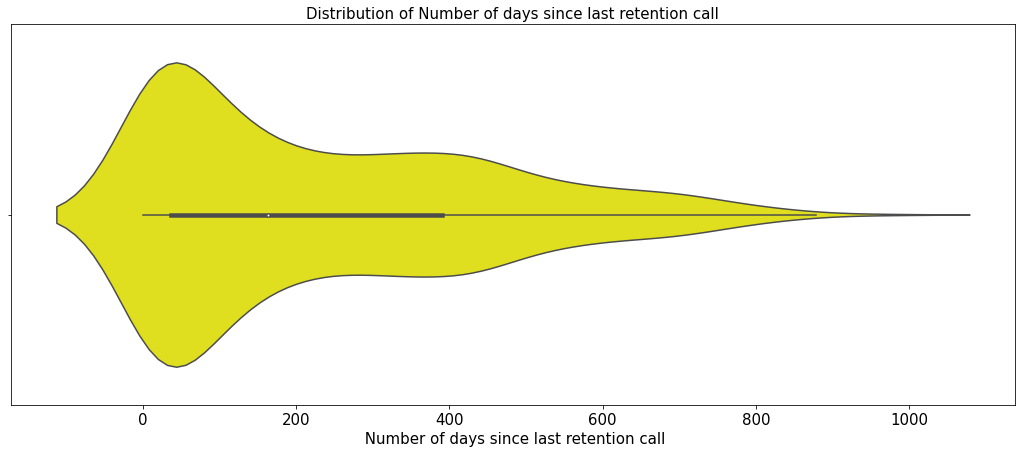

In [56]:
plt.figure(figsize = (18, 7))
sns.violinplot(x = "retdays", data = df, color = "yellow")
plt.title("Distribution of Number of days since last retention call", size = 15)
plt.xlabel(" Number of days since last retention call", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Truck indicator**

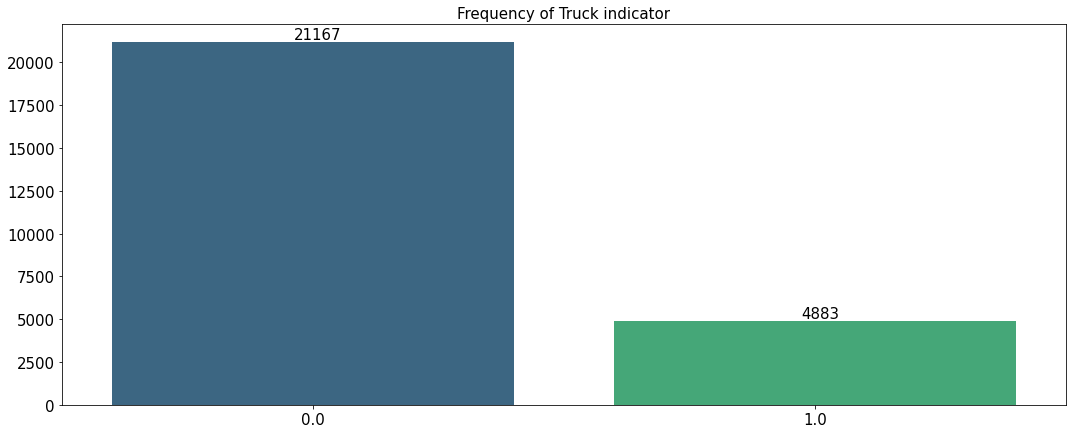

In [57]:
ti = df["truck"].value_counts().to_frame().reset_index()
ti.columns = ["Truck", "Frequency"]
ti

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Truck", y = "Frequency", data = ti, palette = "viridis")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Truck indicator", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Working woman in household**

In [58]:
wh = df["wrkwoman"].value_counts()
wh

Y    3272
Name: wrkwoman, dtype: int64

**Distribution of Mean number of roaming calls**

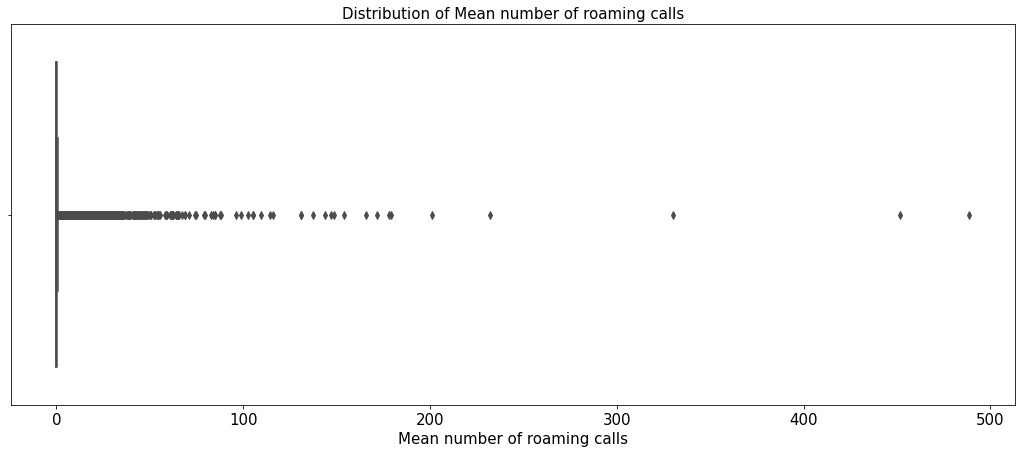

In [59]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "roam_Mean", data = df, color = "red")
plt.title("Distribution of Mean number of roaming calls", size = 15)
plt.xlabel("Mean number of roaming calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of received SMS calls**

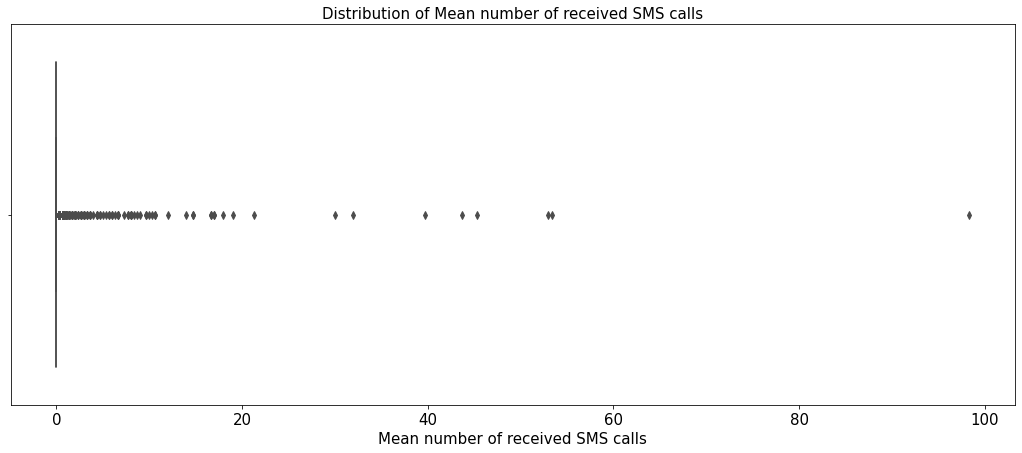

In [60]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "recv_sms_Mean", data = df, color = "red")
plt.title("Distribution of Mean number of received SMS calls", size = 15)
plt.xlabel("Mean number of received SMS calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of blocked (failed) data calls**

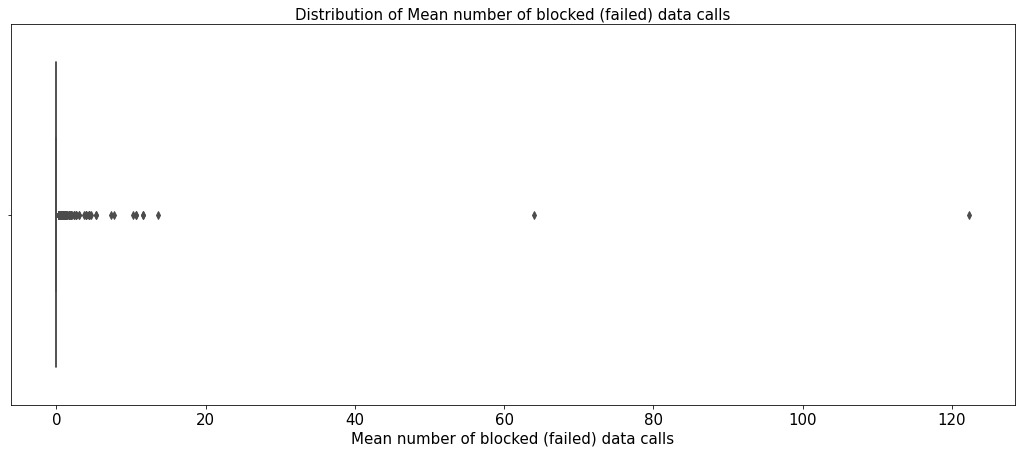

In [61]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "blck_dat_Mean", data = df, color = "red")
plt.title("Distribution of Mean number of blocked (failed) data calls", size = 15)
plt.xlabel("Mean number of blocked (failed) data calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean unrounded minutes of use of peak data calls**

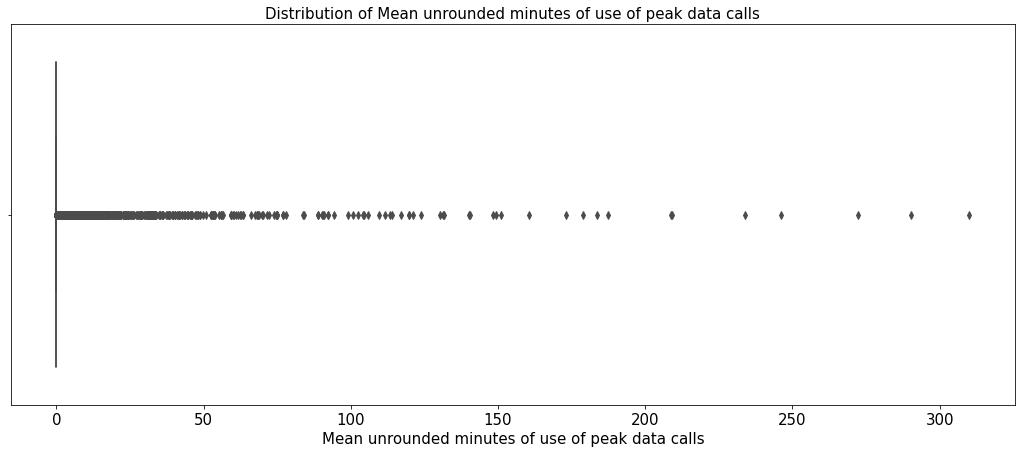

In [62]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "mou_pead_Mean", data = df, color = "red")
plt.title("Distribution of Mean unrounded minutes of use of peak data calls", size = 15)
plt.xlabel("Mean unrounded minutes of use of peak data calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Churn**

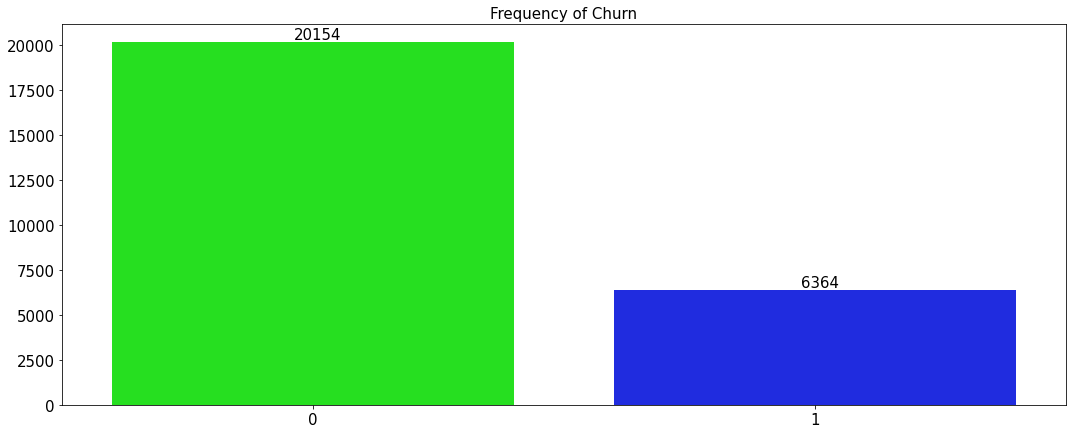

In [63]:
fc = df["churn"].value_counts().to_frame().reset_index()
fc.columns = ["Churn", "Frequency"]
fc

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Churn", y = "Frequency", data = fc, palette = "hsv")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Churn", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Infobase no phone solicitation flag**

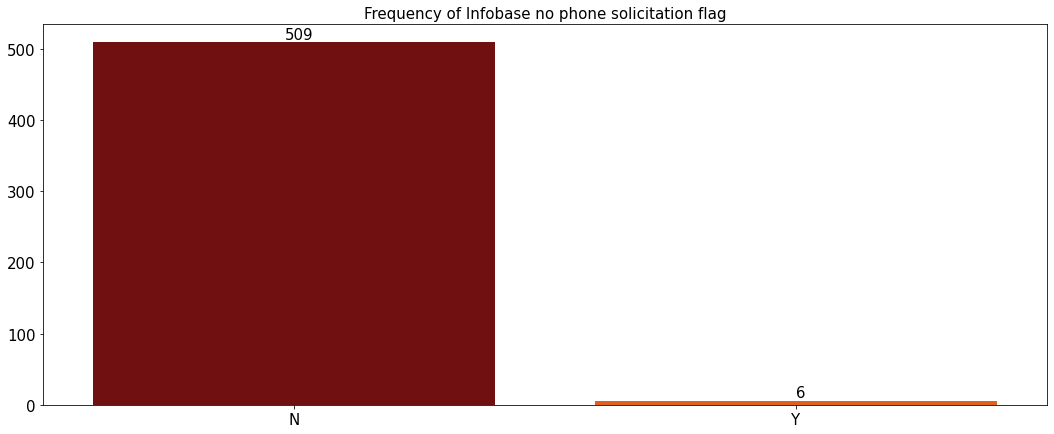

In [64]:
fi = df["solflag"].value_counts().to_frame().reset_index()
fi.columns = ["solflag", "Frequency"]
fi

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "solflag", y = "Frequency", data = fi, palette = "gist_heat")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Infobase no phone solicitation flag", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Property type detail**

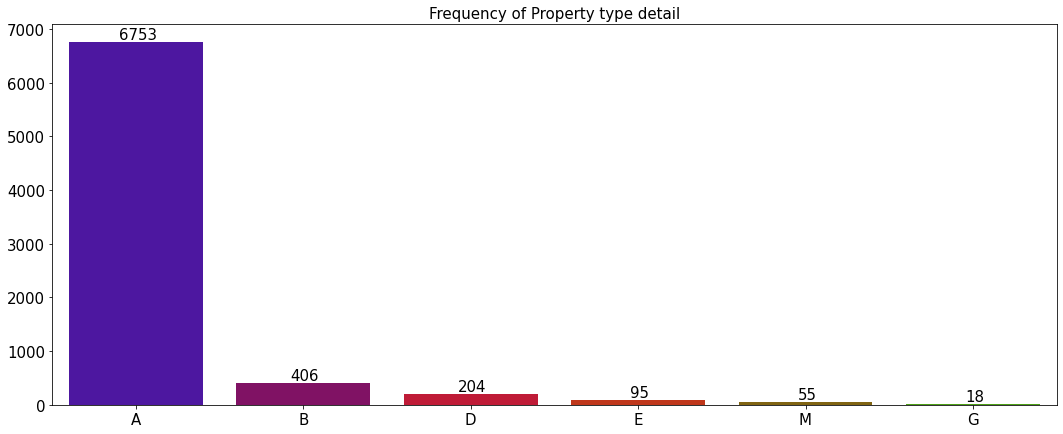

In [65]:
fp = df["proptype"].value_counts().to_frame().reset_index()
fp.columns = ["proptype", "Frequency"]
fp

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "proptype", y = "Frequency", data = fp, palette = "brg")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Property type detail", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Mail responder**

In [66]:
fmr = df["mailresp"].value_counts()
fmr

R    9896
Name: mailresp, dtype: int64

**Frequency of Dominant vehicle lifestyle**

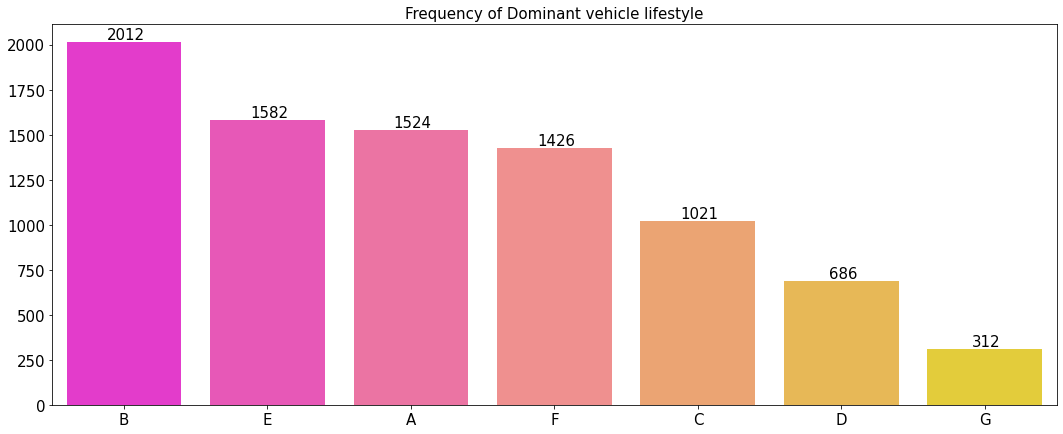

In [67]:
fd = df["cartype"].value_counts().to_frame().reset_index()
fd.columns = ["cartype", "Frequency"]
fd

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "cartype", y = "Frequency", data = fd, palette = "spring")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Dominant vehicle lifestyle", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of New or used car buyer**

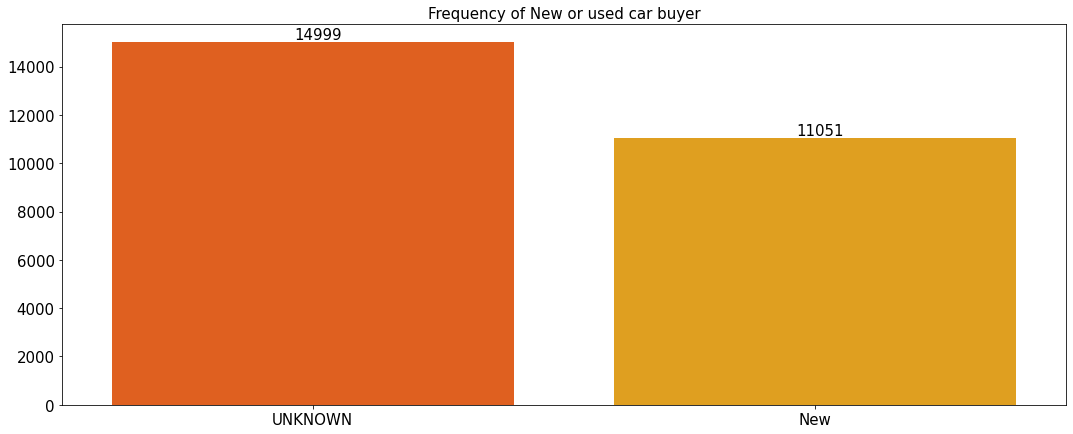

In [68]:
fcb=df["car_buy"].value_counts().to_frame().reset_index()
fcb.columns = ["car_buy", "Frequency"]
fcb

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "car_buy", y = "Frequency", data = fcb,palette = "autumn")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of New or used car buyer", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Children present in household**

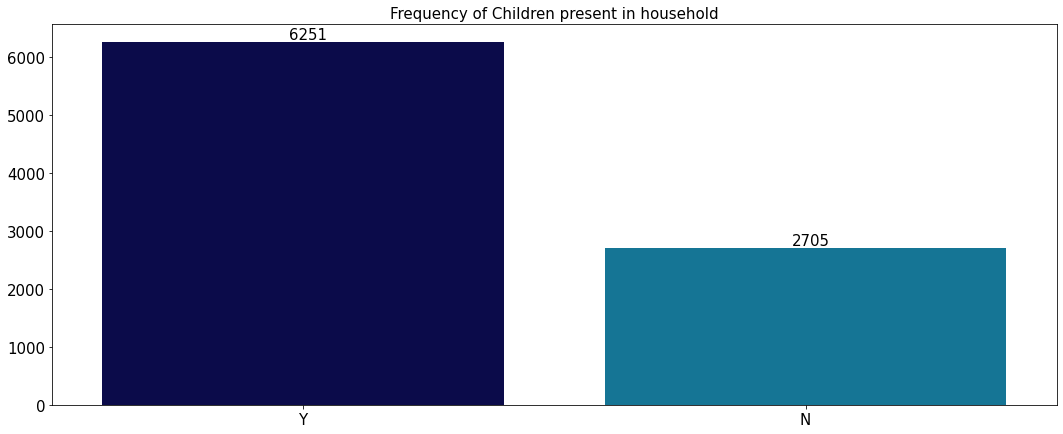

In [69]:
fcp=df["children"].value_counts().to_frame().reset_index()
fcp.columns = ["children", "Frequency"]
fcp

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "children", y = "Frequency", data = fcp, palette = "ocean")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Children present in household", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Frequency of Top 20 Communications local service area**

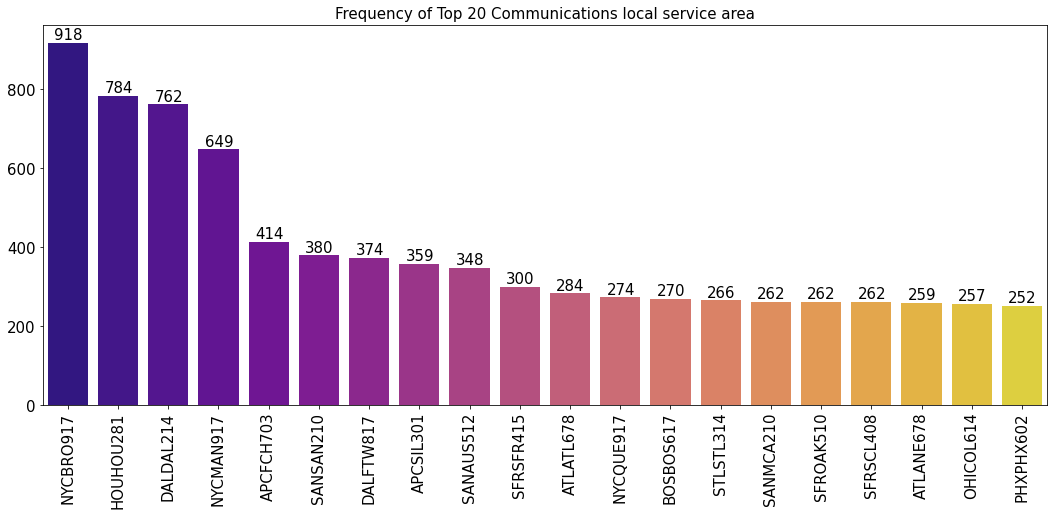

In [70]:
fsa=df["csa"].value_counts().to_frame().reset_index()
fsa.columns = ["CSA", "Frequency"]
fsa = fsa[:20]

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "CSA", y = "Frequency", data = fsa, palette = "plasma")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Top 20 Communications local service area", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Mean number of directory assisted calls**

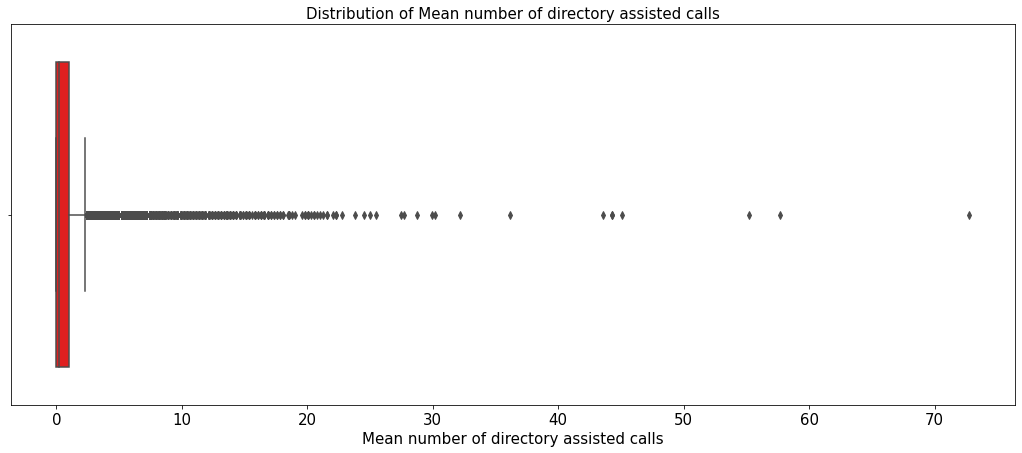

In [71]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "da_Mean", data = df, color = "red")
plt.title("Distribution of Mean number of directory assisted calls", size = 15)
plt.xlabel("Mean number of directory assisted calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of number of directory assisted calls**

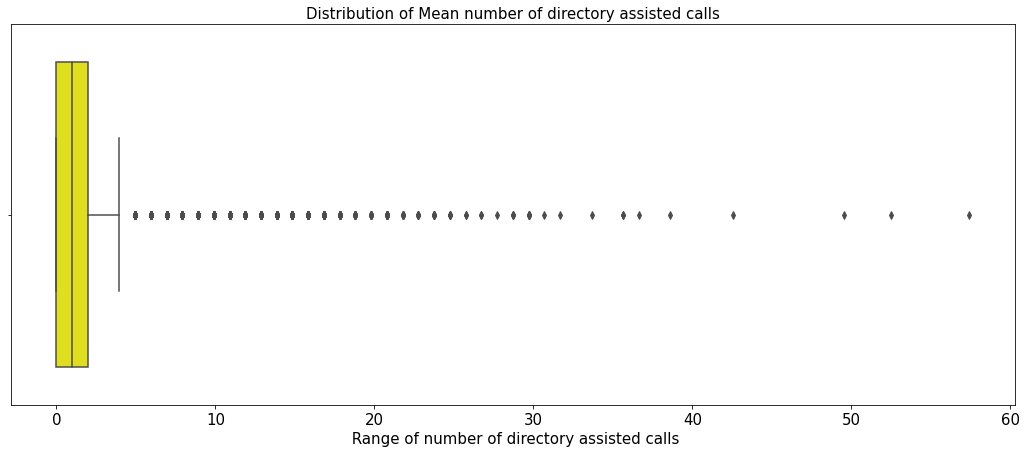

In [72]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "da_Range", data = df, color = "yellow")
plt.title("Distribution of Mean number of directory assisted calls", size = 15)
plt.xlabel(" Range of number of directory assisted calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean revenue of data overage**

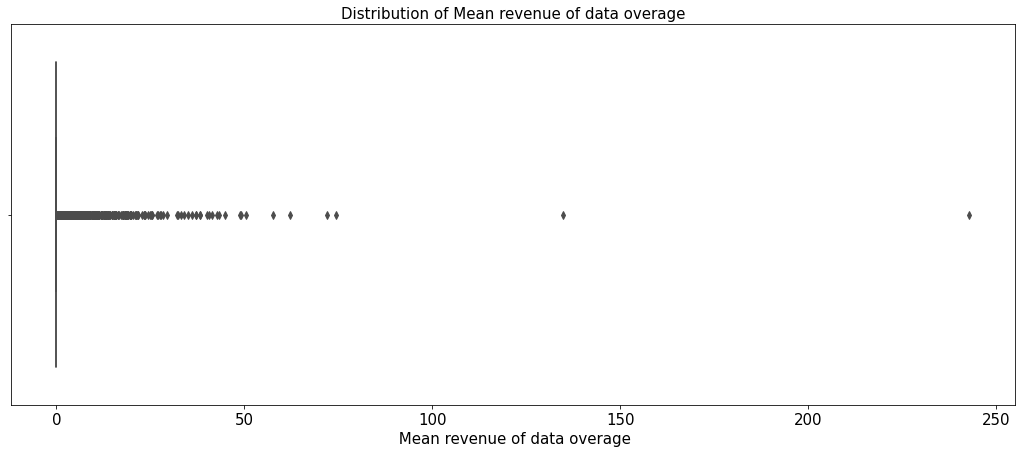

In [73]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "datovr_Mean", data = df, color = "orange")
plt.title("Distribution of Mean revenue of data overage", size = 15)
plt.xlabel(" Mean revenue of data overage", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Range of revenue of data overage**

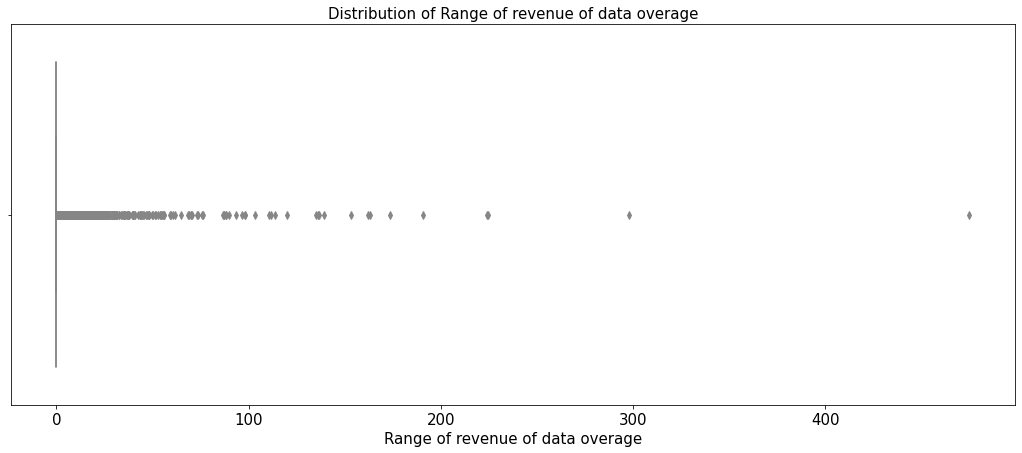

In [74]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "datovr_Range", data = df, color = "pink")
plt.title("Distribution of Range of revenue of data overage", size = 15)
plt.xlabel("Range of revenue of data overage", size = 15)
plt.xticks(size = 15)
plt.show()

**Frequency of Division type code**

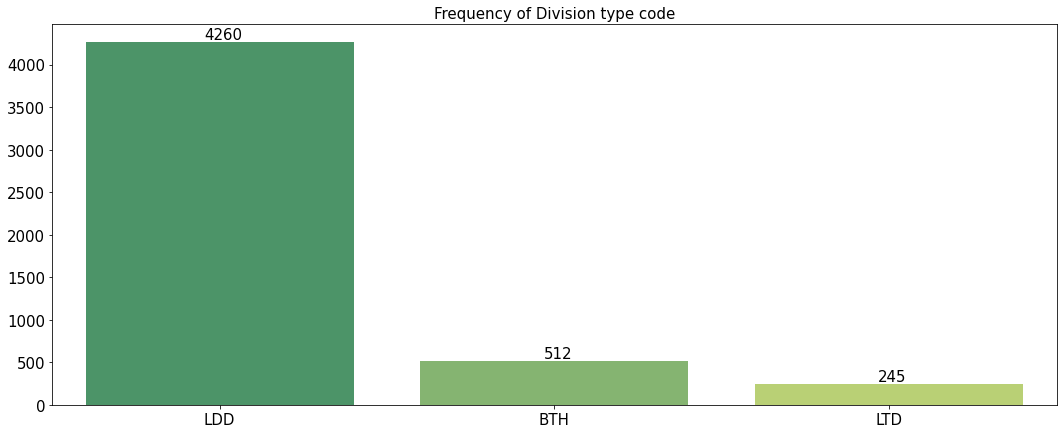

In [75]:
fdt=df["div_type"].value_counts().to_frame().reset_index()
fdt.columns = ["Div_Type", "Frequency"]

plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Div_Type", y = "Frequency", data = fdt, palette = "summer")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.41, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Frequency of Division type code", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Distribution of Mean number of dropped (failed) data calls**

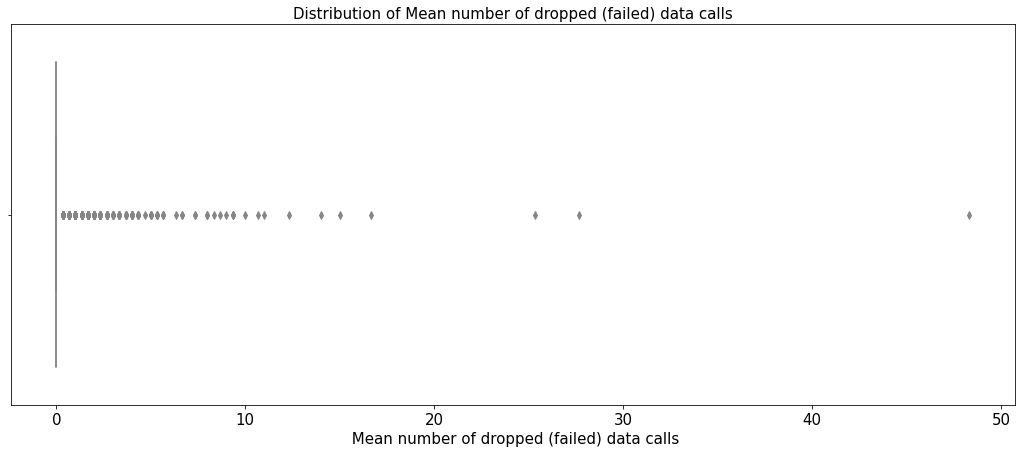

In [76]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "drop_dat_Mean", data = df, color = "pink")
plt.title("Distribution of Mean number of dropped (failed) data calls", size = 15)
plt.xlabel(" Mean number of dropped (failed) data calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of dropped (failed) voice calls**

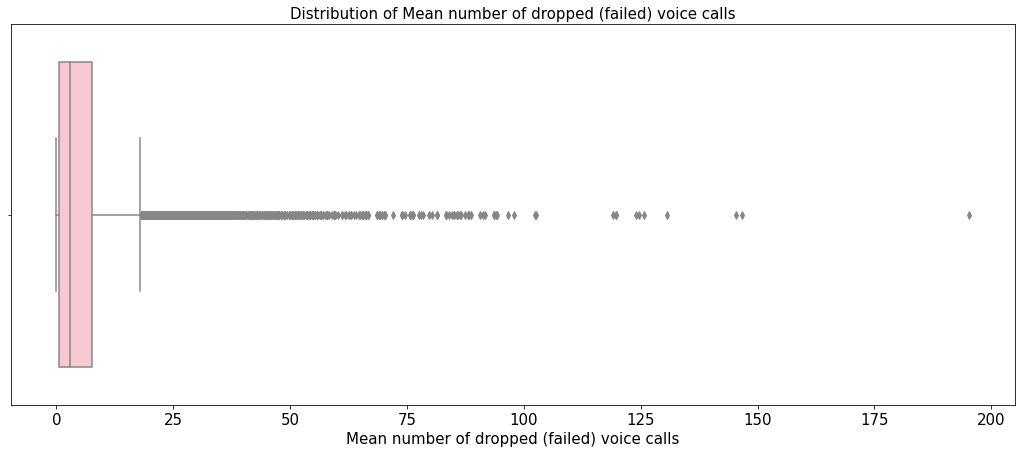

In [77]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "drop_vce_Mean", data = df, color = "pink")
plt.title("Distribution of Mean number of dropped (failed) voice calls", size = 15)
plt.xlabel("Mean number of dropped (failed) voice calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Billing adjusted total minutes of use over the life of the customer**

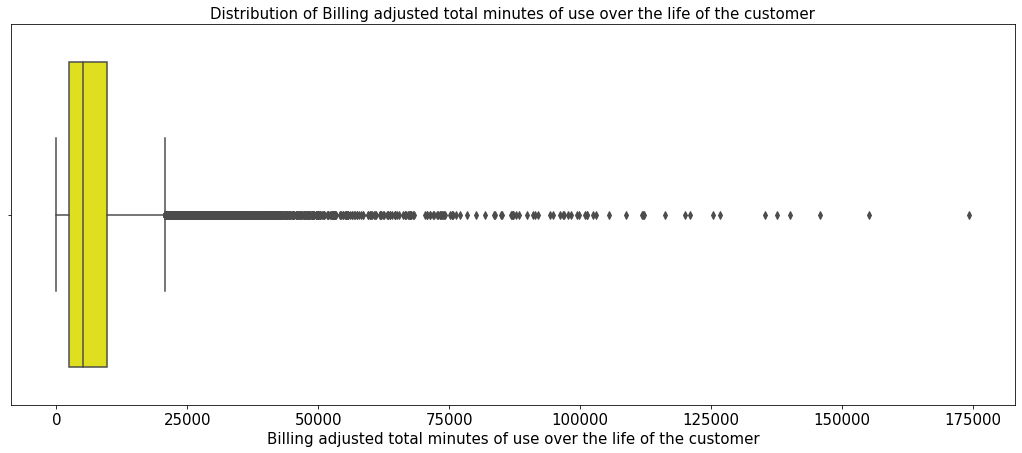

In [78]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "adjmou", data = df, color = "yellow")
plt.title("Distribution of Billing adjusted total minutes of use over the life of the customer", size = 15)
plt.xlabel("Billing adjusted total minutes of use over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Total revenue**

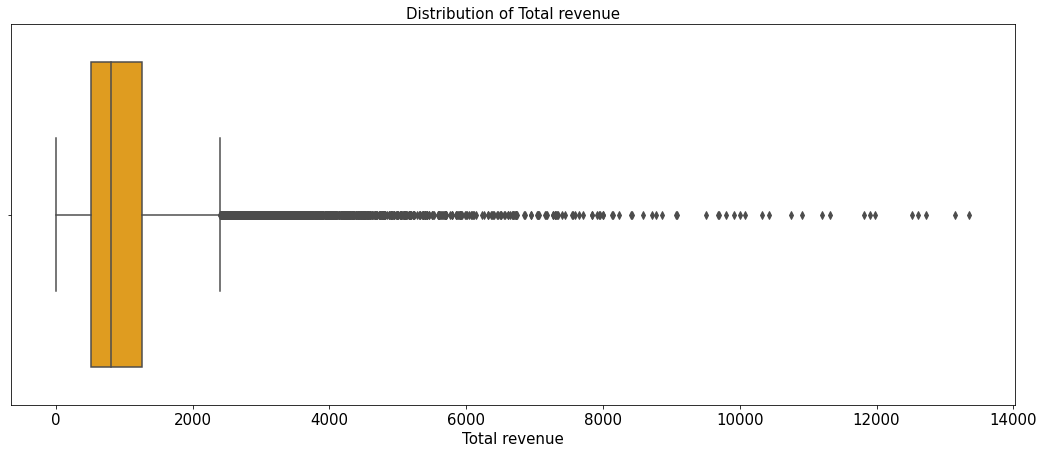

In [79]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "totrev", data = df, color = "orange")
plt.title("Distribution of Total revenue", size = 15)
plt.xlabel("Total revenue", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Billing adjusted total revenue over the life of the customer**

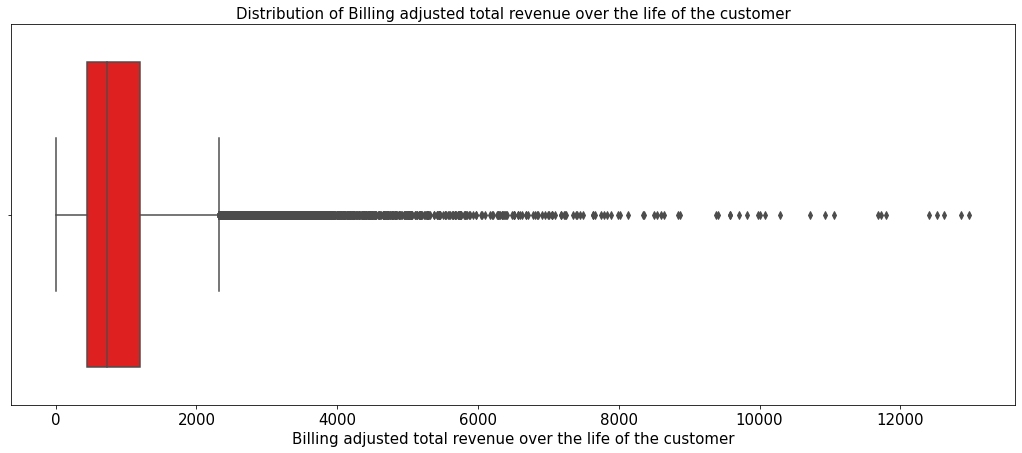

In [80]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "adjrev", data = df, color = "red")
plt.title("Distribution of Billing adjusted total revenue over the life of the customer", size = 15)
plt.xlabel("Billing adjusted total revenue over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Average monthly revenue over the life of the customer**

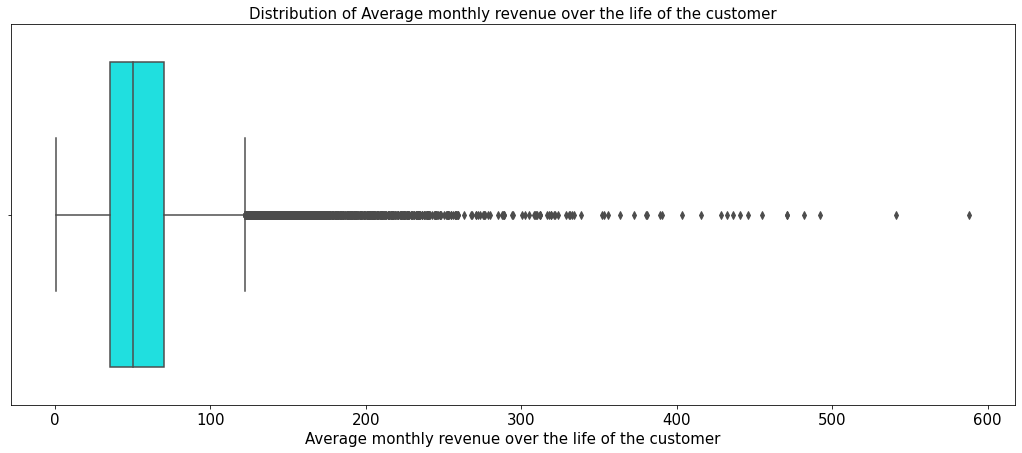

In [81]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "avgrev", data = df, color = "cyan")
plt.title("Distribution of Average monthly revenue over the life of the customer", size = 15)
plt.xlabel("Average monthly revenue over the life of the customer", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of completed data calls**

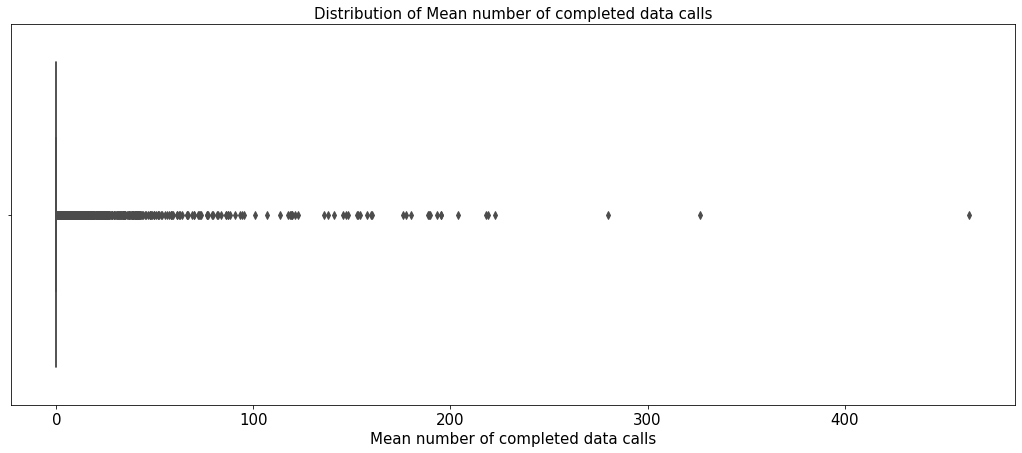

In [82]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "comp_dat_Mean", data = df, color = "yellow")
plt.title("Distribution of Mean number of completed data calls", size = 15)
plt.xlabel("Mean number of completed data calls", size = 15)
plt.xticks(size = 15)
plt.show()

**Distribution of Mean number of attempted data calls placed**

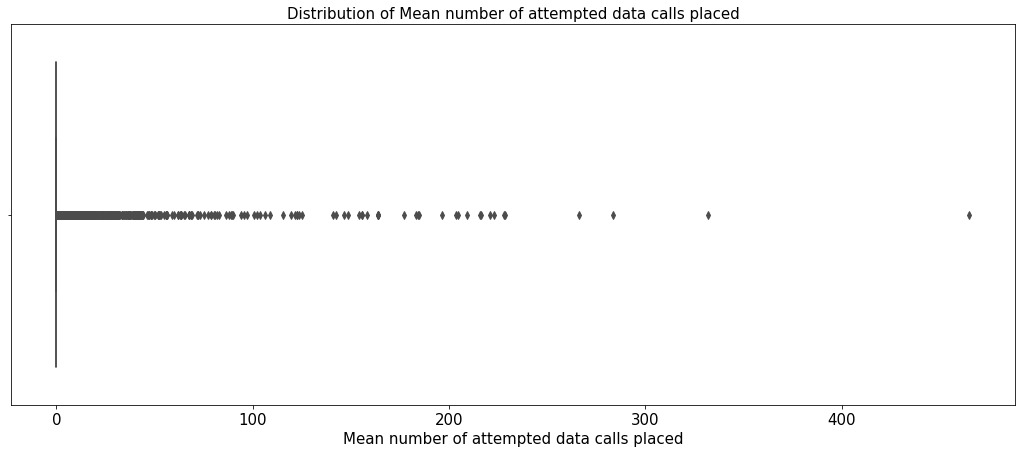

In [83]:
plt.figure(figsize = (18, 7))
sns.boxplot(x = "plcd_dat_Mean", data = df, color = "orange")
plt.title("Distribution of Mean number of attempted data calls placed", size = 15)
plt.xlabel("Mean number of attempted data calls placed", size = 15)
plt.xticks(size = 15)
plt.show()

### Dimensionality Reduction and Data Cleaning

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26460 non-null  float64
 1   totmrc_Mean       26460 non-null  float64
 2   rev_Range         26460 non-null  float64
 3   mou_Range         26460 non-null  float64
 4   change_mou        26357 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  int64  
 7   owylis_vce_Range  26518 non-null  int64  
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  int64  
 10  totcalls          26518 non-null  int64  
 11  income            19821 non-null  float64
 12  eqpdays           26518 non-null  int64  
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  int64 

In [85]:
c = df[df.columns.drop(["crclscod", "asl_flag", "prizm_social_one", "area", "refurb_new", "hnd_webcap", "marital", "ethnic", "dwlltype", "dwllsize", "mailordr", "occu1", "wrkwoman", "solflag", "proptype", "mailresp", "cartype", "car_buy", "children", "csa", "div_type", "retdays", "numbcars", "avg3mou", "avg6mou", "avg3qty", "avg6qty"])]
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          26460 non-null  float64
 1   totmrc_Mean       26460 non-null  float64
 2   rev_Range         26460 non-null  float64
 3   mou_Range         26460 non-null  float64
 4   change_mou        26357 non-null  float64
 5   drop_blk_Mean     26518 non-null  float64
 6   drop_vce_Range    26518 non-null  int64  
 7   owylis_vce_Range  26518 non-null  int64  
 8   mou_opkv_Range    26518 non-null  float64
 9   months            26518 non-null  int64  
 10  totcalls          26518 non-null  int64  
 11  income            19821 non-null  float64
 12  eqpdays           26518 non-null  int64  
 13  custcare_Mean     26518 non-null  float64
 14  callwait_Mean     26518 non-null  float64
 15  iwylis_vce_Mean   26518 non-null  float64
 16  callwait_Range    26518 non-null  int64 

In [86]:
c = c.dropna()
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19512 entries, 0 to 26516
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mou_Mean          19512 non-null  float64
 1   totmrc_Mean       19512 non-null  float64
 2   rev_Range         19512 non-null  float64
 3   mou_Range         19512 non-null  float64
 4   change_mou        19512 non-null  float64
 5   drop_blk_Mean     19512 non-null  float64
 6   drop_vce_Range    19512 non-null  int64  
 7   owylis_vce_Range  19512 non-null  int64  
 8   mou_opkv_Range    19512 non-null  float64
 9   months            19512 non-null  int64  
 10  totcalls          19512 non-null  int64  
 11  income            19512 non-null  float64
 12  eqpdays           19512 non-null  int64  
 13  custcare_Mean     19512 non-null  float64
 14  callwait_Mean     19512 non-null  float64
 15  iwylis_vce_Mean   19512 non-null  float64
 16  callwait_Range    19512 non-null  int64 

### Logistic Regression Stats Model

In [87]:
X = c[c.columns.drop("churn")]

y = c["churn"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [89]:
# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.528191
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                15609
Model:                          Logit   Df Residuals:                    15556
Method:                           MLE   Df Model:                           52
Date:                Sat, 22 May 2021   Pseudo R-squ.:                 0.03046
Time:                        19:49:07   Log-Likelihood:                -8244.5
converged:                       True   LL-Null:                       -8503.5
Covariance Type:            nonrobust   LLR p-value:                 4.981e-78
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
mou_Mean            -0.0009      0.000     -6.388      0.000      -0.001      -0.001
totmrc_Mean         -0.0048      0.002     -2.279      0.023      -0.009      -0.001
rev_Range         1.153e-05      0.001      0.020      0.984      -0.001       0.001
mou_Range            0.0003   9.11e-05      3.225      0.001       0.000       0.000
change_mou          -0.0001   8.61e-05     -1.537      0.124      -0.000    3.64e-05
drop_blk_Mean        0.0028      0.002      1.343      0.179      -0.001       0.007
drop_vce_Range      -0.0018      0.004     -0.466      0.641      -0.009       0.006
owylis_vce_Range    -0.0008      0.001     -0.611      0.541      -0.003       0.002
mou_opkv_Range   -4.377e-05      0.000     -0.246      0.805      -0.000       0.000
months              -0.0173      0.004     -3.887      0.000      -0.026      -0.009
totcalls             0.0003      0.000      0.994      0.320      -0.000       0.001
income               0.0306      0.009      3.302      0.001       0.012       0.049
eqpdays              0.0011      0.000      8.604      0.000       0.001       0.001
custcare_Mean       -0.0092      0.007     -1.368      0.171      -0.022       0.004
callwait_Mean        0.0087      0.006      1.355      0.175      -0.004       0.021
iwylis_vce_Mean     -0.0012      0.002     -0.657      0.511      -0.005       0.002
callwait_Range      -0.0025      0.007     -0.351      0.725      -0.017       0.012
ccrndmou_Range      -0.0007      0.002     -0.469      0.639      -0.004       0.002
adjqty              -0.0003      0.000     -1.187      0.235      -0.001       0.000
ovrrev_Mean          0.0013      0.003      0.413      0.679      -0.005       0.007
rev_Mean             0.0049      0.002      2.264      0.024       0.001       0.009
ovrmou_Mean      -8.368e-05      0.001     -0.098      0.922      -0.002       0.002
comp_vce_Mean       -0.0025      0.001     -2.247      0.025      -0.005      -0.000
plcd_vce_Mean        0.0012      0.001      1.470      0.142      -0.000       0.003
avgmou               0.0002      0.000      0.656      0.512      -0.000       0.001
avgqty               0.0014      0.001      2.508      0.012       0.000       0.003
age1                -0.0053      0.001     -3.730      0.000      -0.008      -0.003
age2                -0.0020      0.001     -2.027      0.043      -0.004   -6.77e-05
models               0.0914      0.035      2.614      0.009       0.023       0.160
hnd_price           -0.0021      0.000     -5.441      0.000      -0.003      -0.001
actvsubs            -0.1609      0.051     -3.163      0.002      -0.261      -0.061
uniqsubs             0.1904      0.038      5.059      0.000       0.117       0.264
forgntvl             0.0339      0.074      0.460      0.645      -0.110       0.178
opk_dat_Mean        -0.0169      0.016     -1.078      0.281      -0.048       0.014
mtrcycle             0.1063      0.143      0.743      0.457      -0.174       0.387
truck      

### Drop featutes whicjh have p > |z| greater than 0.05

In [90]:
df = df[df.columns.drop(["rev_Range", 
                         "change_mou", 
                         "drop_blk_Mean", 
                         "drop_vce_Range", 
                         "owylis_vce_Range", 
                         "mou_opkv_Range",
                         "income",
                         "callwait_Mean",
                         "iwylis_vce_Mean",
                         "callwait_Range",
                         "ccrndmou_Range",
                         "adjqty",
                         "ovrrev_Mean",
                         "ovrmou_Mean",
                         "comp_vce_Mean",
                         "plcd_vce_Mean",
                         "avgmou",
                         "age2",
                         "forgntvl",
                         "opk_dat_Mean",
                         "mtrcycle",
                         "truck",
                         "roam_Mean",
                         "recv_sms_Mean",
                         "blck_dat_Mean",
                         "mou_pead_Mean",
                         "da_Mean",
                         "da_Range",
                         "datovr_Mean",
                         "datovr_Range",
                         "drop_dat_Mean",
                         "totrev",
                         "adjrev",
                         "avgrev",
                         "Customer_ID",
                         "comp_dat_Mean",
                         "plcd_dat_Mean"])]
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avg3mou,avg3qty,avgqty,avg6mou,avg6qty,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,age1,models,hnd_price,actvsubs,uniqsubs,dwlltype,dwllsize,mailordr,occu1,numbcars,retdays,wrkwoman,churn,solflag,proptype,mailresp,cartype,car_buy,children,csa,div_type,drop_vce_Mean,adjmou
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,194,91,84.92,211.0,99.0,AA,N,T,ATLANTIC SOUTH AREA,N,WCMB,M,N,36.0,1,199.98999,2,2,S,A,B,A,NaN,NaN,Y,0,NaN,A,R,NaN,UNKNOWN,Y,AIRCOL803,NaN,3.666667,2376.0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,469,188,185.83,467.0,166.0,EA,N,U,LOS ANGELES AREA,N,WCMB,U,S,0.0,1,149.98999,1,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,NaN,New,NaN,LAXCUL310,NaN,3.000000,5565.0


### Drop features which have low variance

In [91]:
df.describe()

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avg3mou,avg3qty,avgqty,avg6mou,avg6qty,age1,models,hnd_price,actvsubs,uniqsubs,numbcars,retdays,churn,drop_vce_Mean,adjmou
count,26460.000000,26460.000000,26460.000000,26518.000000,26518.000000,26518.000000,26518.000000,26460.000000,26518.000000,26518.000000,26518.000000,25704.000000,25704.000000,26050.000000,26518.000000,26264.000000,26518.000000,26518.000000,13559.000000,866.000000,26518.000000,26518.000000,26518.000000
mean,533.578283,47.189057,378.747600,18.693114,2936.164228,376.450072,1.903424,59.357292,538.477977,185.868580,177.225857,527.020347,183.764278,31.162994,1.569462,104.950393,1.349348,1.519798,1.562136,233.841801,0.239988,6.083666,7707.226798
std,541.184126,24.264305,428.889022,9.736302,4006.455522,251.967184,5.488562,44.649536,549.295120,198.642909,174.079887,514.239338,189.692189,22.133762,0.910224,60.319106,0.627512,0.841855,0.627785,218.240487,0.427084,9.095215,9060.873112
min,0.000000,-26.915000,0.000000,6.000000,0.000000,-5.000000,0.000000,-2.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.989998,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,160.500000,30.000000,114.000000,11.000000,868.000000,202.000000,0.000000,33.761250,159.000000,57.000000,63.690000,169.000000,60.000000,0.000000,1.000000,59.989990,1.000000,1.000000,1.000000,37.250000,0.000000,0.666667,2454.000000
50%,368.500000,44.990000,245.000000,16.000000,1808.000000,326.000000,0.000000,48.800000,369.000000,129.000000,128.840000,375.000000,130.000000,36.000000,1.000000,99.989990,1.000000,1.000000,1.000000,163.000000,0.000000,3.000000,5105.000000
75%,733.250000,59.990000,485.000000,24.000000,3533.750000,510.000000,1.666667,71.950625,737.000000,247.000000,233.617500,721.000000,244.000000,48.000000,2.000000,149.989990,2.000000,2.000000,2.000000,391.000000,0.000000,7.666667,9739.000000
max,7667.750000,399.990000,6233.000000,60.000000,92076.000000,1812.000000,365.666667,926.077500,7270.000000,3261.000000,2475.750000,5589.000000,2759.000000,94.000000,15.000000,499.989990,11.000000,12.000000,3.000000,966.000000,1.000000,195.333333,174383.380000


In [92]:
df.describe(exclude = "number")

,crclscod,asl_flag,prizm_social_one,area,refurb_new,hnd_webcap,marital,ethnic,dwlltype,dwllsize,mailordr,occu1,wrkwoman,solflag,proptype,mailresp,cartype,car_buy,children,csa,div_type
count,26518,26518,24637,26513,26518,24136,26050,26050,18137,16428,9508,7030,3272,515,7531,9896,8563,26050,8956,26513,5017
unique,49,2,5,19,2,3,5,17,2,15,1,21,1,2,6,1,7,2,2,694,3
top,AA,N,S,NEW YORK CITY AREA,N,WCMB,U,N,S,A,B,1,Y,N,A,R,B,UNKNOWN,Y,NYCBRO917,LDD
freq,9602,22535,8475,3055,22863,20660,9821,8912,12968,12521,9508,2723,3272,509,6753,9896,2012,14999,6251,918,4260


### Remove features having low variance and which are not useful for moel building

In [93]:
df = df[df.columns.drop(["models", 
                         "actvsubs", 
                         "uniqsubs", 
                         "numbcars", 
                         "crclscod", 
                         "asl_flag", 
                         "refurb_new", 
                         "dwlltype",
                         "mailordr",
                         "wrkwoman",
                         "solflag",
                         "mailresp",
                         "car_buy",
                         "children",
                         "asl_flag"])]
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avg3mou,avg3qty,avgqty,avg6mou,avg6qty,prizm_social_one,area,hnd_webcap,marital,ethnic,age1,hnd_price,dwllsize,occu1,retdays,churn,proptype,cartype,csa,div_type,drop_vce_Mean,adjmou
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,194,91,84.92,211.0,99.0,T,ATLANTIC SOUTH AREA,WCMB,M,N,36.0,199.98999,A,A,NaN,0,A,NaN,AIRCOL803,NaN,3.666667,2376.0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,469,188,185.83,467.0,166.0,U,LOS ANGELES AREA,WCMB,U,S,0.0,149.98999,NaN,NaN,NaN,0,NaN,NaN,LAXCUL310,NaN,3.000000,5565.0


### Remove Redundant Features and features having large number of null values¶

In [94]:
df = df.drop(["avg3mou", "avg3qty", "avg6mou", "avg6qty", "dwllsize", "occu1", "retdays", "proptype", "cartype", "div_type"], axis = 1)
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,prizm_social_one,area,hnd_webcap,marital,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,T,ATLANTIC SOUTH AREA,WCMB,M,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,U,LOS ANGELES AREA,WCMB,U,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0


### Dummy Variables Preparation

In [95]:
area = pd.get_dummies(df["area"])
area = area[["NEW YORK CITY AREA", "DC/MARYLAND/VIRGINIA AREA", "MIDWEST AREA", "LOS ANGELES AREA"]]
df = pd.concat([df, area], axis = 1)
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,prizm_social_one,area,hnd_webcap,marital,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,T,ATLANTIC SOUTH AREA,WCMB,M,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0,0,0,0,0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,U,LOS ANGELES AREA,WCMB,U,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0,0,0,0,1


In [96]:
df = df[df.columns.drop("area")]

In [97]:
social = pd.get_dummies(df["prizm_social_one"])
df = pd.concat([df, social], axis = 1)
df = df[df.columns.drop("prizm_social_one")]
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,hnd_webcap,marital,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA,C,R,S,T,U
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,WCMB,M,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0,0,0,0,0,0,0,0,1,0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,WCMB,U,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0,0,0,0,1,0,0,0,0,1


In [98]:
hnd = pd.get_dummies(df["hnd_webcap"])
df = pd.concat([df, hnd], axis = 1)
df = df[df.columns.drop("hnd_webcap")]
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,marital,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA,C,R,S,T,U,UNKW,WC,WCMB
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,M,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0,0,0,0,0,0,0,0,1,0,0,0,1
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,U,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0,0,0,0,1,0,0,0,0,1,0,0,1


In [99]:
ms = pd.get_dummies(df["marital"])
df = pd.concat([df, ms], axis = 1)
df = df.drop("marital", axis = 1)
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA,C,R,S,T,U,UNKW,WC,WCMB,A,B,M,S,U
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1


In [100]:
csa = pd.get_dummies(df["csa"])
csa = csa[["NYCBRO917", "HOUHOU281", "DALDAL214", "NYCMAN917"]]
df = pd.concat([df, csa], axis = 1)
df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,ethnic,age1,hnd_price,churn,csa,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA,C,R,S,T,U,UNKW,WC,WCMB,A,B,M,S,U,NYCBRO917,HOUHOU281,DALDAL214,NYCMAN917
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,N,36.0,199.98999,0,AIRCOL803,3.666667,2376.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,S,0.0,149.98999,0,LAXCUL310,3.000000,5565.0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [101]:
df = df.drop("csa", axis = 1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26518 entries, 0 to 26517
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mou_Mean                   26460 non-null  float64
 1   totmrc_Mean                26460 non-null  float64
 2   mou_Range                  26460 non-null  float64
 3   months                     26518 non-null  int64  
 4   totcalls                   26518 non-null  int64  
 5   eqpdays                    26518 non-null  int64  
 6   custcare_Mean              26518 non-null  float64
 7   rev_Mean                   26460 non-null  float64
 8   avgqty                     26518 non-null  float64
 9   ethnic                     26050 non-null  object 
 10  age1                       26050 non-null  float64
 11  hnd_price                  26264 non-null  float64
 12  churn                      26518 non-null  int64  
 13  drop_vce_Mean              26518 non-null  flo

### Drop Null Values

In [103]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25746 entries, 0 to 26517
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mou_Mean                   25746 non-null  float64
 1   totmrc_Mean                25746 non-null  float64
 2   mou_Range                  25746 non-null  float64
 3   months                     25746 non-null  int64  
 4   totcalls                   25746 non-null  int64  
 5   eqpdays                    25746 non-null  int64  
 6   custcare_Mean              25746 non-null  float64
 7   rev_Mean                   25746 non-null  float64
 8   avgqty                     25746 non-null  float64
 9   ethnic                     25746 non-null  object 
 10  age1                       25746 non-null  float64
 11  hnd_price                  25746 non-null  float64
 12  churn                      25746 non-null  int64  
 13  drop_vce_Mean              25746 non-null  flo

In [104]:
df = df.drop("ethnic", axis = 1)

In [105]:
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.95)
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]

# Drop the features in the to_drop list
df = df.drop(to_drop, axis = 1)
df[:3]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,age1,hnd_price,churn,drop_vce_Mean,adjmou,NEW YORK CITY AREA,DC/MARYLAND/VIRGINIA AREA,MIDWEST AREA,LOS ANGELES AREA,C,R,T,UNKW,WC,WCMB,A,B,M,NYCBRO917,HOUHOU281,DALDAL214,NYCMAN917
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,36.0,199.98999,0,3.666667,2376.0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,0.0,149.98999,0,3.000000,5565.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,400.50,44.99,172.0,29,3276,213,1.000000,40.5350,121.07,32.0,99.98999,0,0.333333,7866.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [106]:
# Features
X = df.drop("churn", axis = 1)

# Target
y = df["churn"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.3)

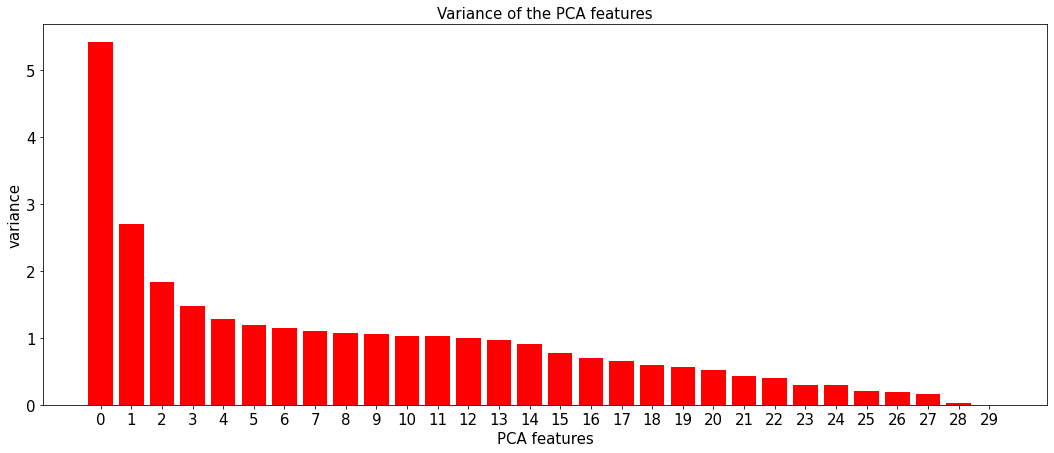

In [108]:
# Fit the scaler on the training features and transform these in one go
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()


# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)

plt.figure(figsize = (18, 7))
plt.bar(features, pca.explained_variance_, color = "red")
plt.title("Variance of the PCA features", size = 15)
plt.xlabel("PCA features", size = 15)
plt.ylabel("variance", size = 15)
plt.xticks(features, size = 15)
plt.yticks(size = 15)
plt.show()

In [109]:
X = X.iloc[:, features[ :13]]
X[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,age1,hnd_price,drop_vce_Mean,adjmou
0,190.25,63.94,43.0,14,1104,403,0.000000,53.4900,84.92,36.0,199.98999,3.666667,2376.0
1,443.00,39.99,199.0,13,2237,404,1.333333,34.3575,185.83,0.0,149.98999,3.000000,5565.0


In [110]:
log_X = np.log(X)
log_X[:5]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,age1,hnd_price,drop_vce_Mean,adjmou
0,5.248339,4.157945,3.761200,2.639057,7.006695,5.998937,-inf,3.979495,4.441710,3.583519,5.298267,1.299283,7.773174
1,6.093570,3.688629,5.293305,2.564949,7.712891,6.001415,0.287682,3.536820,5.224832,-inf,5.010569,1.098612,8.624252
2,5.992714,3.806440,5.147494,3.367296,8.094378,5.361292,0.000000,3.702166,4.796369,3.465736,4.605070,-1.098612,8.970305
3,3.979682,3.545803,4.356709,3.218876,7.566311,6.629363,1.540445,3.656873,4.384149,3.526361,3.400864,-0.405465,8.673171
4,3.610918,3.046544,4.304065,3.496508,6.480045,6.890609,-1.098612,3.046544,3.021400,4.356709,3.400864,0.287682,7.360740


In [111]:
new_df = pd.concat([log_X, df["churn"]], axis = 1)
new_df[:2]

,mou_Mean,totmrc_Mean,mou_Range,months,totcalls,eqpdays,custcare_Mean,rev_Mean,avgqty,age1,hnd_price,drop_vce_Mean,adjmou,churn
0,5.248339,4.157945,3.761200,2.639057,7.006695,5.998937,-inf,3.979495,4.441710,3.583519,5.298267,1.299283,7.773174,0
1,6.093570,3.688629,5.293305,2.564949,7.712891,6.001415,0.287682,3.536820,5.224832,-inf,5.010569,1.098612,8.624252,0


In [112]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [113]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25746 entries, 0 to 26517
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mou_Mean       25452 non-null  float64
 1   totmrc_Mean    25671 non-null  float64
 2   mou_Range      25420 non-null  float64
 3   months         25746 non-null  float64
 4   totcalls       25741 non-null  float64
 5   eqpdays        25712 non-null  float64
 6   custcare_Mean  11870 non-null  float64
 7   rev_Mean       25745 non-null  float64
 8   avgqty         25738 non-null  float64
 9   age1           18513 non-null  float64
 10  hnd_price      25746 non-null  float64
 11  drop_vce_Mean  21938 non-null  float64
 12  adjmou         25738 non-null  float64
 13  churn          25746 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 2.9 MB


**Drop Features which have large null values**

In [114]:
new_df = new_df.drop(["age1", "custcare_Mean"], axis = 1)
new_df = new_df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21851 entries, 0 to 26517
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mou_Mean       21851 non-null  float64
 1   totmrc_Mean    21851 non-null  float64
 2   mou_Range      21851 non-null  float64
 3   months         21851 non-null  float64
 4   totcalls       21851 non-null  float64
 5   eqpdays        21851 non-null  float64
 6   rev_Mean       21851 non-null  float64
 7   avgqty         21851 non-null  float64
 8   hnd_price      21851 non-null  float64
 9   drop_vce_Mean  21851 non-null  float64
 10  adjmou         21851 non-null  float64
 11  churn          21851 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 2.2 MB


In [115]:
# Features
X = new_df[new_df.columns.drop("churn")]

# Target
y = new_df["churn"]

In [116]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

In [117]:
scaler = StandardScaler()

In [118]:
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

### K Neighbors Classification

In [119]:
k = []
for n in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_std, y_train)
    yhat = knn.predict(X_test_std)
    score = accuracy_score(y_test, yhat)
    k.append(score)
k

[0.6616334934797529,
 0.7353008464882178,
 0.7080759551590026,
 0.7423930450697781,
 0.7277510867078472,
 0.75177304964539,
 0.7403340196751316,
 0.7545184168382522,
 0.7465110958590712]

In [120]:
best_k = k.index(max(k)) + 1
print("Best Depth Index = " + str(best_k))
print("Best Depth Accuracy = " + str(k[best_k - 1]))

Best Depth Index = 8
Best Depth Accuracy = 0.7545184168382522


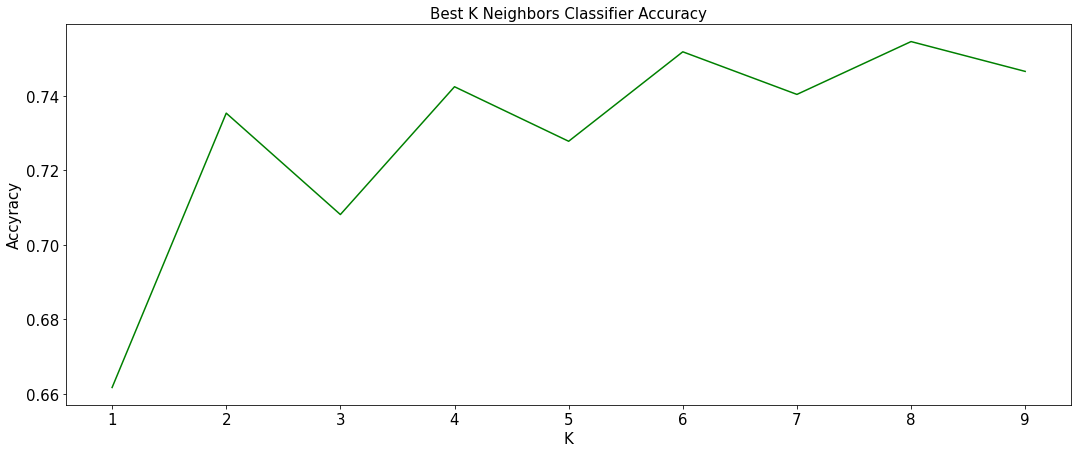

In [121]:
k_list = range(1, 10)
plt.figure(figsize = (18, 7))
plt.title("Best K Neighbors Classifier Accuracy", size = 15)
plt.plot(k_list, k, color = "green")
plt.xlabel("K", size = 15)
plt.ylabel("Accyracy", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [122]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0:10]

,Actual Outcome,Predicted Outcome
25440,0,0
13014,1,0
553,0,0
8192,0,0
4494,0,0
13809,0,0
3246,0,0
13674,0,0
11712,0,0
17955,0,0


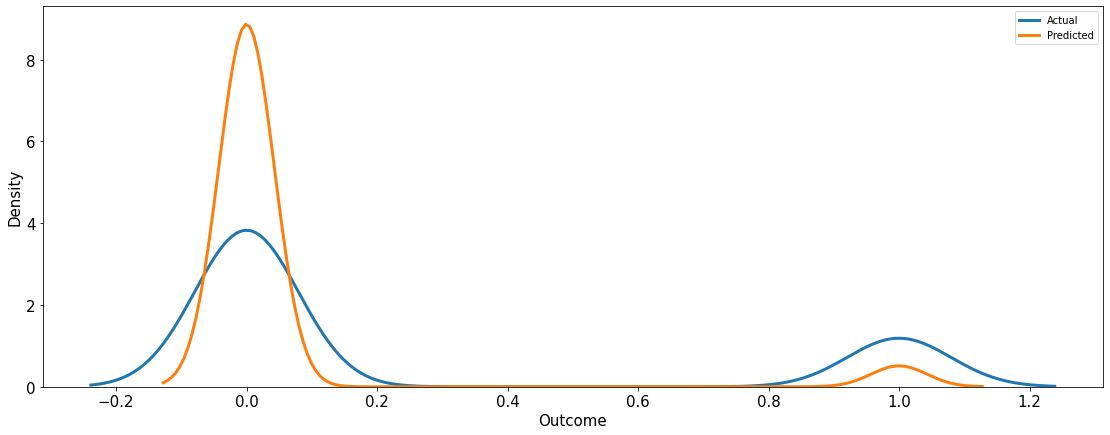

In [123]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(yhat, label = "Predicted", linewidth = 3)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend()
plt.show()

In [124]:
print(confusion_matrix(y_test, y_pred))

[[3240   96]
 [ 977   58]]


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      3336
           1       0.38      0.06      0.10      1035

    accuracy                           0.75      4371
   macro avg       0.57      0.51      0.48      4371
weighted avg       0.68      0.75      0.68      4371



### Logistic Regression

In [126]:
# Logistic Regression Object
log_reg = LogisticRegression()

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

# Fit data in logistic regression Object
log_reg.fit(X_train_std, y_train)

# Test Outcome of Test Data
y_pred = log_reg.predict(X_test_std)

# Actual vs Predicted
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[::500]

,Actual Outcome,Predicted Outcome
18061,0,0
8742,0,0
4015,1,0
21487,0,0
1952,0,0
3431,0,0
23283,1,0
13753,0,0
6931,0,0


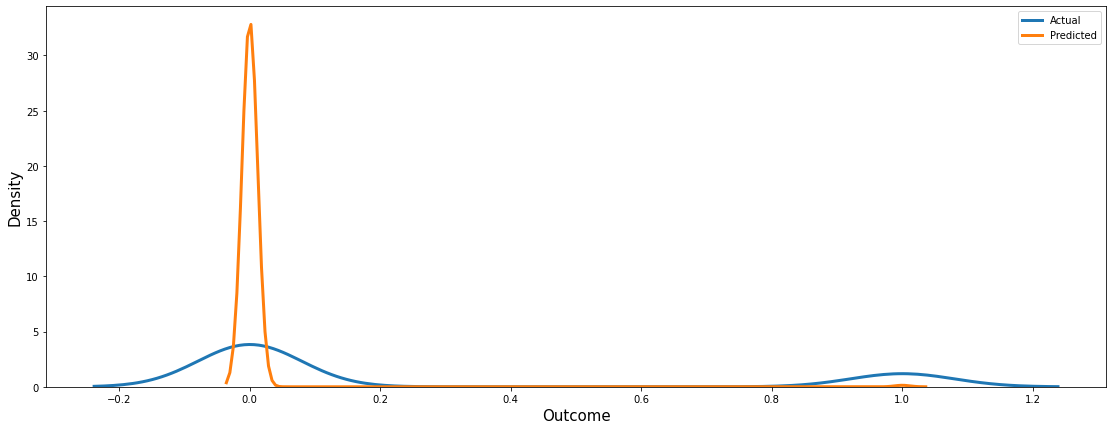

In [127]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3336
           1       0.33      0.01      0.01      1035

    accuracy                           0.76      4371
   macro avg       0.55      0.50      0.44      4371
weighted avg       0.66      0.76      0.66      4371



In [129]:
print(confusion_matrix(y_test, y_pred))

[[3324   12]
 [1029    6]]


### Hyperparameter Tuning

**Grid Search CV**

In [130]:
# Hyperparameters
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space, "penalty": ["l1", "l2"]}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


# Instantiate the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

# Fit the model into data
logreg_cv.fit(X_train_std, y_train)

# Tuned Logistic Regression Parameters
print("Tuned Logistic Regression Parameters =", logreg_cv.best_params_, "\n")
print("Best score is =", logreg_cv.best_score_)

Tuned Logistic Regression Parameters = {'C': 1e-05, 'penalty': 'l2'} 

Best score is = 0.763329519450801


In [131]:
y_pred = logreg_cv.predict(X_test_std)

In [132]:
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": y_pred})[0::500]

,Actual Outcome,Predicted Outcome
13262,0,0
4024,1,0
3953,0,0
7042,0,0
2145,0,0
378,0,0
18134,0,0
2014,0,0
7960,1,0


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.00      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.38      0.50      0.43      4371
weighted avg       0.58      0.76      0.66      4371



In [134]:
print(confusion_matrix(y_test, y_pred))

[[3336    0]
 [1035    0]]


### Hyperparameter tuning with RandomizedSearchCV

**Decision Tree Classification**

In [135]:
# Setup the parameters
param_dist = {"max_depth": range(1, 10),
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


# Fit it to the data
tree_cv.fit(X_train_std, y_train)

# Print the tuned parameters
print("Tuned Decision Tree Parameters =", tree_cv.best_params_, "\n")

# Best score
print("Best Score is =", tree_cv.best_score_)

Tuned Decision Tree Parameters = {'criterion': 'gini', 'max_depth': 1, 'max_features': 7, 'min_samples_leaf': 5} 

Best Score is = 0.763329519450801


In [136]:
# Actual Outcome vs Predicted Outcome
yhat = tree_cv.predict(X_test_std)
pd.DataFrame({"Actual Outcome": y_test, "Predicted Outcome": yhat})[0:10]

,Actual Outcome,Predicted Outcome
3851,1,0
15504,0,0
24776,0,0
7137,0,0
11149,1,0
19067,0,0
10770,0,0
8606,0,0
10629,0,0
5553,0,0


In [137]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.00      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.38      0.50      0.43      4371
weighted avg       0.58      0.76      0.66      4371



In [138]:
print(confusion_matrix(y_test, y_pred))

[[3336    0]
 [1035    0]]


**Regularization affect on training accuracy**

In [139]:

# Weak Regularization
lr_wr = LogisticRegression(C = 100)

# Strong Regularization
lr_sr = LogisticRegression(C = 0.01)


# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

# Fit training data in weak regularized logistic regression
lr_wr.fit(X_train_std, y_train)

# Fit training data in strong regularized logistic regression
lr_sr.fit(X_train_std, y_train)


lr_wr_score = lr_wr.score(X_train_std, y_train)
print("Score of training data in weak regularized logistic regression =", lr_wr_score, "\n")

lr_sr_score = lr_sr.score(X_train_std, y_train)
print("Score of training data in strong regularized logistic regression =", lr_sr_score)

Score of training data in weak regularized logistic regression = 0.7623569794050343 

Score of training data in strong regularized logistic regression = 0.7628718535469108


In [140]:
# Weak regularized logistic regression
y_pred_w = lr_wr.predict(X_test_std)
print(confusion_matrix(y_test, y_pred_w))

[[3324   12]
 [1022   13]]


In [141]:
print(classification_report(y_test, y_pred_w))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.52      0.01      0.02      1035

    accuracy                           0.76      4371
   macro avg       0.64      0.50      0.44      4371
weighted avg       0.71      0.76      0.67      4371



In [142]:
# Strong regularized logistic regression
y_pred_s = lr_sr.predict(X_test_std)
print(confusion_matrix(y_test, y_pred_s))

[[3333    3]
 [1032    3]]


In [143]:
print(classification_report(y_test, y_pred_s))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.50      0.00      0.01      1035

    accuracy                           0.76      4371
   macro avg       0.63      0.50      0.44      4371
weighted avg       0.70      0.76      0.66      4371



### Lasso (L1) vs Ridge (L2) Regularization

In [144]:
# Logistic Regression Object (Lasso)
lr_l1 = LogisticRegression(penalty = "none")

# Logistic Regression Object (Ridge default)
lr_l2 = LogisticRegression()        


# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

# Fit Data in lr_l1
lr_l1.fit(X_train_std, y_train)

# Fit Data in lr_l2
lr_l2.fit(X_train_std, y_train)


lr_l1_score = lr_l1.score(X_train_std, y_train)
print("Score of training data in Lasso Logistic Regression =", lr_wr_score, "\n")

lr_l2_score = lr_l2.score(X_train_std, y_train)
print("Score of training data in Ridge Logistic Regression =", lr_sr_score)

Score of training data in Lasso Logistic Regression = 0.7623569794050343 

Score of training data in Ridge Logistic Regression = 0.7628718535469108


In [145]:
y_pred = lr_l1.predict(X_test_std)

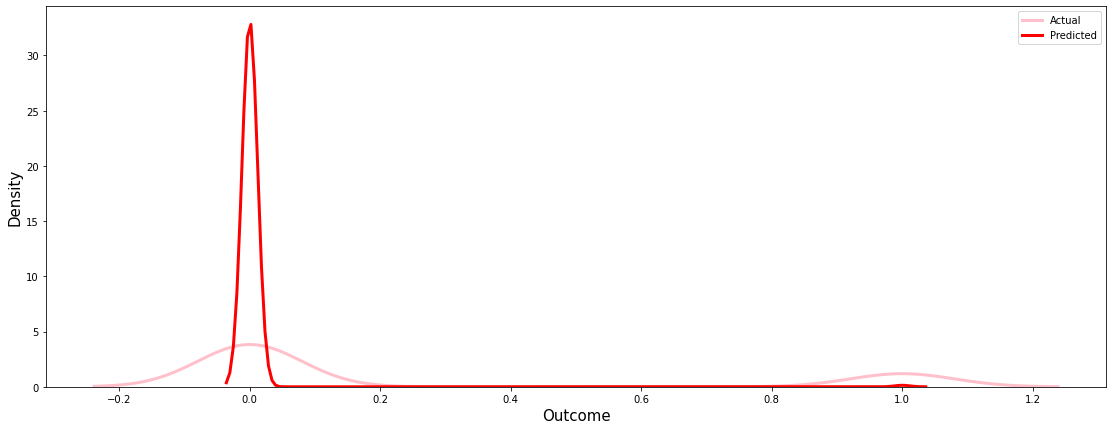

In [146]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3336
           1       0.28      0.00      0.01      1035

    accuracy                           0.76      4371
   macro avg       0.52      0.50      0.44      4371
weighted avg       0.65      0.76      0.66      4371



In [148]:
print(confusion_matrix(y_test, y_pred))

[[3323   13]
 [1030    5]]


In [149]:
y_pred = lr_l2.predict(X_test_std)

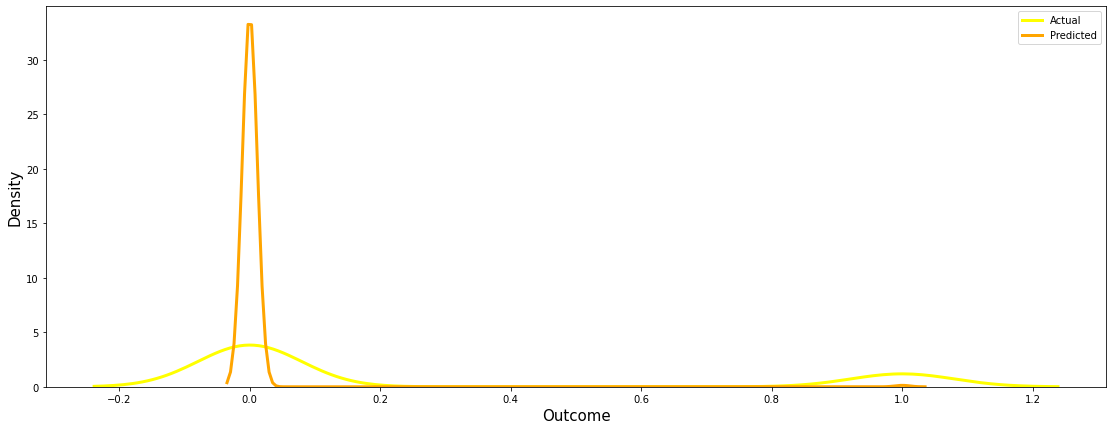

In [150]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [151]:
print(confusion_matrix(y_test, y_pred))

[[3324   12]
 [1030    5]]


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3336
           1       0.29      0.00      0.01      1035

    accuracy                           0.76      4371
   macro avg       0.53      0.50      0.44      4371
weighted avg       0.65      0.76      0.66      4371



### Plot Coefficients (Lasso)

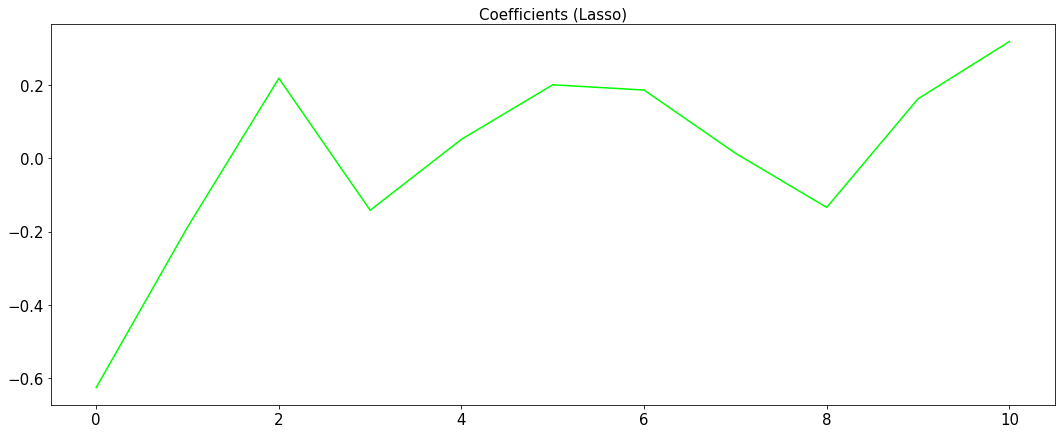

In [153]:
plt.figure(figsize = (18, 7))
plt.plot(lr_l1.coef_.flatten(), color = "lime")
plt.title("Coefficients (Lasso)", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Plot Coefficients (Ridge)

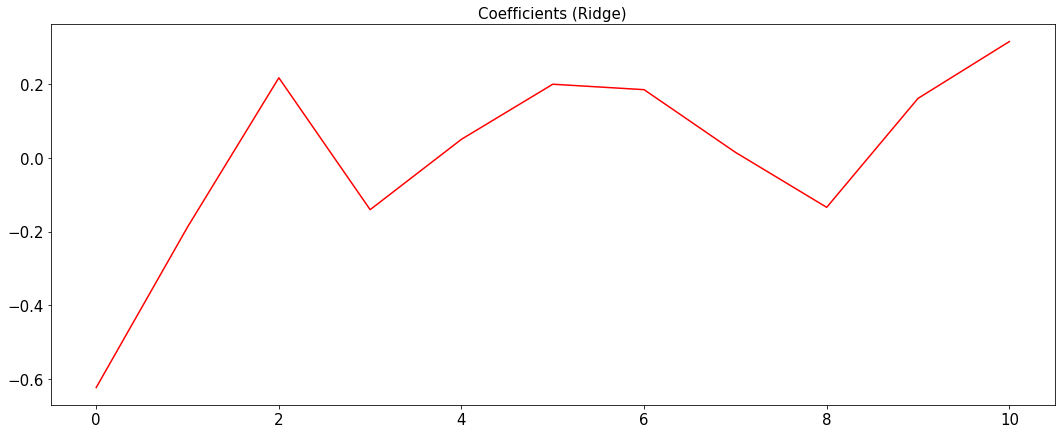

In [154]:
plt.figure(figsize = (18, 7))
plt.plot(lr_l2.coef_.flatten(), color = "red")
plt.title("Coefficients (Ridge)", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

### Kernel SVMs

In [157]:
#Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

searcher.fit(X_train_std, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 1e-05}


**Jointly tuning gamma and C with GridSearchCV**

In [158]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {"C": [0.1, 1, 10],
              "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1]}

searcher = GridSearchCV(svm, parameters)

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

searcher.fit(X_train_std, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_, "\n")

print("Best CV accuracy", searcher.best_score_)

Best CV params {'C': 0.1, 'gamma': 1e-05} 

Best CV accuracy 0.763329519450801


### SGDC Classifier

In [159]:
# We set random_state=0 for reproducibility
classifier = SGDClassifier(random_state = 0)

# Instantiate the GridSearchCV object and run the search
parameters = {"alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              "loss": ["hinge", "log"],
              "penalty": ["l1", "l2"]}

searcher = GridSearchCV(classifier, parameters, cv = 3)

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


searcher.fit(X_train_std, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_, "\n")
print("Best CV accuracy", searcher.best_score_, "\n")
print("Test Accuracy of Best Grid Search Hypers:", searcher.score(X_test_std, y_test))

Best CV params {'alpha': 0.001, 'loss': 'log', 'penalty': 'l1'} 

Best CV accuracy 0.7636155230907068 

Test Accuracy of Best Grid Search Hypers: 0.7627545184168383


In [160]:
y_pred = searcher.predict(X_test_std)

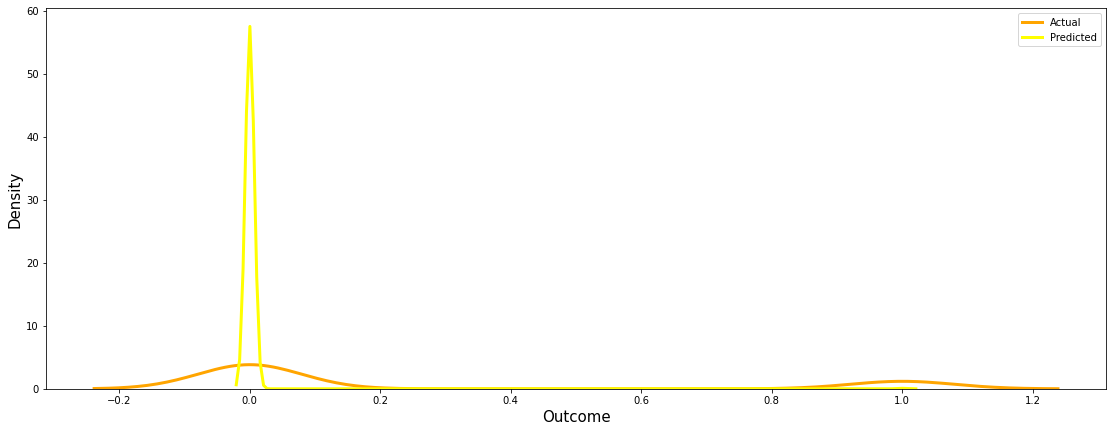

In [161]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "yellow")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [162]:
print(confusion_matrix(y_test, y_pred))

[[3332    4]
 [1033    2]]


In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.33      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.55      0.50      0.43      4371
weighted avg       0.66      0.76      0.66      4371



### Random Forest

In [164]:
# Random Frest Classifier Object
rf = RandomForestClassifier(n_estimators = 400,
                           min_samples_leaf = 0.12,
                           random_state = 42)


x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)

# Fit data into training model
rf.fit(X_train_std, y_train)

# Prediction
y_pred = rf.predict(X_test_std)

### Feature Importance

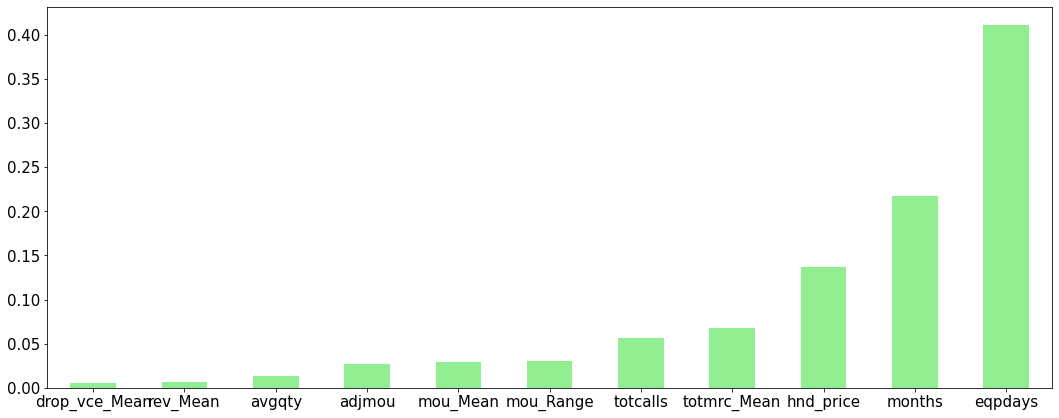

In [165]:
# Create a pd.Series of features importance
importance_rf = pd.Series(rf.feature_importances_, index = X.columns)
importance_rf = importance_rf.sort_values()
importance_rf.plot(kind = "bar", color = "lightgreen", figsize = (18, 7))
plt.xticks(size = 15, rotation = 0)
plt.yticks(size = 15)
plt.show()

In [166]:
print(confusion_matrix(y_test, y_pred))

[[3336    0]
 [1035    0]]


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.00      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.38      0.50      0.43      4371
weighted avg       0.58      0.76      0.66      4371



### Voting Classifier

In [168]:
# Classifiers
classifiers = [("Logistic Regression", LogisticRegression()),
               ("K Nearest Neighbours", KNeighborsClassifier()),
               ("Classification Tree", DecisionTreeClassifier()),
               ("SVM", SVC()),
               ("SGDC", SGDClassifier()),
               ("Random Forest", RandomForestClassifier())]

for name, clf in classifiers:
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} : {score.round(3)}")

Logistic Regression : 0.763
K Nearest Neighbours : 0.724
Classification Tree : 0.663
SVM : 0.763
SGDC : 0.763
Random Forest : 0.758


### Find best parameters for logistic regression

In [169]:
lr = LogisticRegression(random_state = 5)

cv_lr = GridSearchCV(lr, {"C": [0.001, 0.01, 0.1, 1, 10]})

cv_lr.fit(X_train_std, y_train)

yhat = cv_lr.predict(X_test_std)
print("Best CV params =", cv_lr.best_params_)
print("Accuracy =", accuracy_score(y_test, yhat))

Best CV params = {'C': 0.001}
Accuracy = 0.7632120796156486


### Find best parameters for K Neighbours Classifier

In [170]:
knn = KNeighborsClassifier()

cv_knn = GridSearchCV(knn, {"n_neighbors": np.arange(1, 10)})

cv_knn.fit(X_train_std, y_train)

yhat = cv_knn.predict(X_test_std)
print("Best CV params =", cv_knn.best_params_)
print("Accuracy =", accuracy_score(y_test, yhat))

Best CV params = {'n_neighbors': 8}
Accuracy = 0.7515442690459849


### Find best parameters for Decision Tree Classification

In [171]:
tree = DecisionTreeClassifier(random_state = 5)

cv_dt = GridSearchCV(tree, {"max_depth": np.arange(1, 10),
                      "min_samples_leaf": np.linspace(0, 1, 110).round(2)})

cv_dt.fit(X_train_std, y_train)

yhat = cv_dt.predict(X_test_std)
print("Best CV params =", cv_dt.best_params_)
print("Accuracy =", accuracy_score(y_test, yhat))

Best CV params = {'max_depth': 1, 'min_samples_leaf': 0.01}
Accuracy = 0.7632120796156486


### Voting Classifier with best Parameters

In [172]:
# Classifiers
classifiers = [("Logistic Regression", LogisticRegression(C = 0.01)),
               ("K Nearest Neighbours", KNeighborsClassifier(n_neighbors = 8)),
               ("Classification Tree", DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 0.01)),
               ("SVM", SVC(C = 0.1, gamma = 0.00001)),
               ("SGDC", SGDClassifier(alpha = 0.01, loss = "log", penalty = "l2")),
               ("Random Forest", RandomForestClassifier(min_samples_leaf = 0.12))]

for name, clf in classifiers:
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} : {score.round(6)}")

Logistic Regression : 0.763212
K Nearest Neighbours : 0.751544
Classification Tree : 0.763212
SVM : 0.763212
SGDC : 0.763441
Random Forest : 0.763212


In [173]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators = classifiers)

# Fit vc to the training set
vc.fit(X_train_std, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test_std)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Voting Classifier Accuracy =", accuracy.round(3))

Voting Classifier Accuracy = 0.763


### Bagging

In [174]:
# Parameters
parameters = {"max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110).round(2)}


# Decision Tree Classifier Object
dt = DecisionTreeClassifier()

# Grid Search Cross Validation Object
cv = GridSearchCV(dt, parameters, cv = 5)


# Fit Training Data into Model
cv.fit(X_train_std, y_train)

print("Best CV parameters =", cv.best_params_)
print("Best CV accuracy =", cv.best_score_)

Best CV parameters = {'max_depth': 1, 'min_samples_leaf': 0.01}
Best CV accuracy = 0.763329519450801


### Bagging Classifier

In [175]:
# Instantiate a classification-tree
dt = DecisionTreeClassifier(max_depth = 1, min_samples_leaf = 0.01, random_state = 42)

# Instantiate a Bagging-Classifier
bc = BaggingClassifier(base_estimator = dt, n_estimators = 300, n_jobs = -1)

# Fit "bc" to training set
bc.fit(X_train_std, y_train)

# Predict the test labels
y_pred = bc.predict(X_test_std)

# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)

# Accuracy of Bagging Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifier =", accuracy)

Accuracy of Bagging Classifier = 0.7632120796156486


### Adaboost

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.2,
                                                    stratify = y)

X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


# Parameters
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110)}

# Decision Tree Classifier Object
dt = DecisionTreeClassifier(random_state = 42)

# Grid Search CV Object
cv = GridSearchCV(dt, parameters, cv = 3)

# Fit training data into model
cv.fit(X_train_std, y_train)

# Best Parameters and Score
print("Best CV parameters =", cv.best_params_, "\n")
print("Best CV accuracy =", cv.best_score_)

Best CV parameters = {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 0.009174311926605505} 

Best CV accuracy = 0.7633295179015702


In [177]:
# Instantiate a classification - tree "dt"
dt = DecisionTreeClassifier(criterion = "gini",
                            max_depth = 1,
                            min_samples_leaf = 0.009,
                            random_state = 42)

# Instabtiate an Adaboost Classifier "adab-clf"
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

# Fit Training Data
adb_clf.fit(X_train_std, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_test_std)[:, 1]

# Evaluate test set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score =", adb_clf_roc_auc_score)

ROC AUC score = 0.639030369906973


In [178]:
# Check Accuracy
y_pred = adb_clf.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print("Acuracy Score =", score)

Acuracy Score = 0.7622969572180279


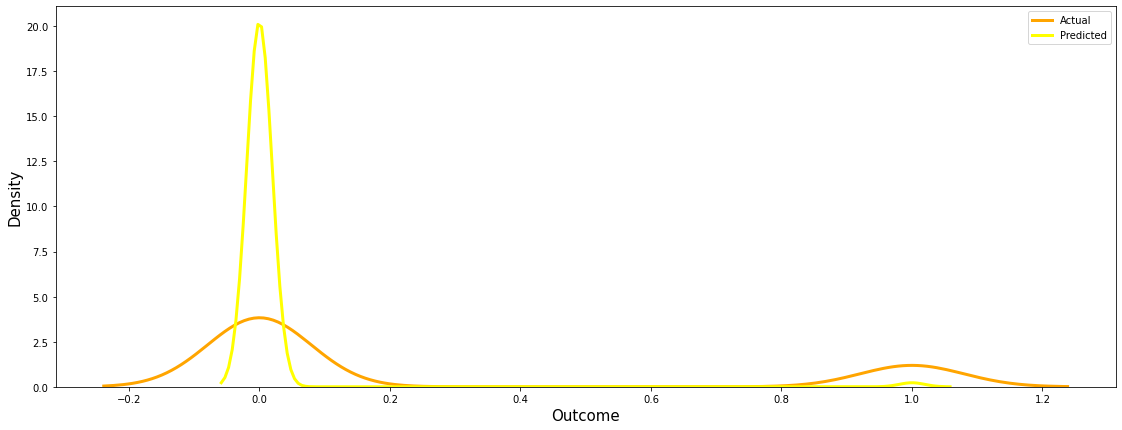

In [179]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "orange")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "yellow")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [180]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      3336
           1       0.46      0.02      0.04      1035

    accuracy                           0.76      4371
   macro avg       0.61      0.51      0.45      4371
weighted avg       0.69      0.76      0.67      4371



In [181]:
print(confusion_matrix(y_test, y_pred))

[[3310   26]
 [1013   22]]


### Gradient Boosting Classifier

In [198]:
# Instantiate a Gradient Boosting Regressor object
gbr = GradientBoostingClassifier()

# Parameters Range
parameters = {"n_estimators": np.arange(1, 10),
              "max_depth": np.arange(1, 10)}

# Grid Search Cross Validation
cv = GridSearchCV(gbr, parameters, cv = 3)

# Fit cv to training set
cv.fit(X_train_std, y_train)

# Best Parameters and Accuracy
print("Best Parameters =", cv.best_params_)
print("Best Accuracy =", cv.best_score_)

Best Parameters = {'max_depth': 6, 'n_estimators': 4}
Best Accuracy = 0.7635583574009527


In [199]:
# Instantiate a Gradient Boosting Regressor object
gbr = GradientBoostingClassifier(max_depth = 6, n_estimators = 4)

# Fit Training Data
gbr.fit(X_train_std, y_train)

# Predict Test Set Labels
y_pred = gbr.predict(X_test_std)

# Check Accuracy
y_pred = gbr.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print("Acuracy Score =", score)

Acuracy Score = 0.7632120796156486


In [200]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[3336    0]
 [1035    0]]


In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.00      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.38      0.50      0.43      4371
weighted avg       0.58      0.76      0.66      4371



### Stochastic Gradient Boosting

In [202]:
# Stochastic Gradient Boosting Object
sgbt = GradientBoostingClassifier(max_depth = 5,
                                 subsample = 0.8,
                                 max_features = 0.2,
                                 n_estimators = 9,
                                 random_state = 1)

# Fit Training Data into Model
sgbt.fit(X_train_std, y_train)


# Check Accuracy
y_pred = gbr.predict(X_test_std)
score = accuracy_score(y_test, y_pred)
print("Acuracy Score =", score)

Acuracy Score = 0.7632120796156486


In [203]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[3336    0]
 [1035    0]]


In [204]:
# Confusion Matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      3336
           1       0.00      0.00      0.00      1035

    accuracy                           0.76      4371
   macro avg       0.38      0.50      0.43      4371
weighted avg       0.58      0.76      0.66      4371



### XGBoost Classification

In [205]:
# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(n_estimators = 10,
                          objective = "binary:logistic",
                          eval_metric = "logloss")

# Fit the classifier to the training set
xg_cl.fit(X_train_std, y_train)

# Predict the labels of the test set: preds
y_pred = xg_cl.predict(X_test_std)

# Compare Actual and Predicted Values
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:10]

,Actual,Predicted
19280,1,0
753,0,0
20463,0,0
2763,1,0
23325,0,0
26293,1,0
22503,0,0
3910,0,0
15201,0,0
13677,0,0


In [206]:
score = accuracy_score(y_test, y_pred)
print("Accuracy Score =", score.round(2))

Accuracy Score = 0.76


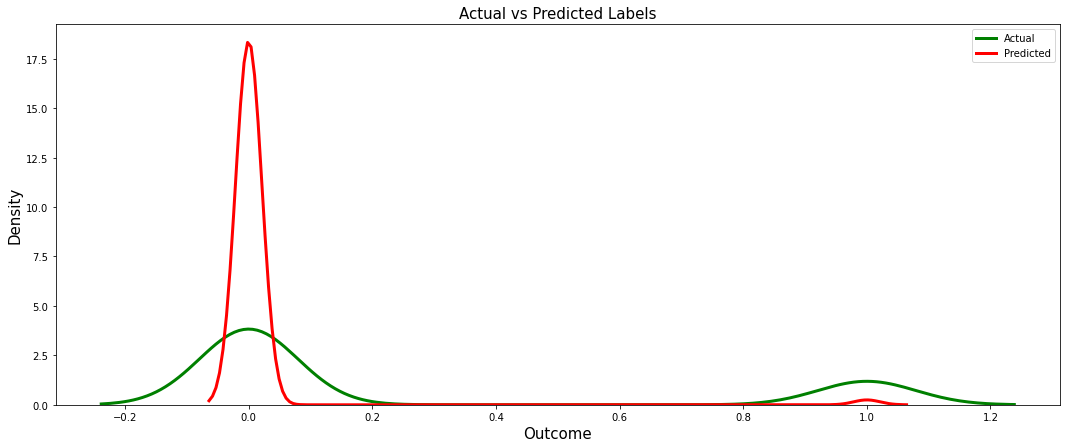

In [207]:
plt.figure(figsize = (18, 7))
sns.kdeplot(x = y_test, label = "Actual", color = "green", linewidth = 3)
sns.kdeplot(y_pred, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual vs Predicted Labels", size = 15)
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

### Measuring Accuracy

In [208]:
# Create the DMatrix from X and y: churn_dmatrix
churn_dmatrix = xgb.DMatrix(data = X_train_std, label = y_train)

# Create the parameter dictionary: params
parameters = {"objective": "reg:logistic",
              "max_depth": 3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain = churn_dmatrix,
                    params = parameters,
                    nfold = 3,
                    num_boost_round = 5,
                    metrics = "error",
                    as_pandas = True,
                    seed = 123)

# Print cv_results
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.236299,0.001902,0.236671,0.003597
1,0.236671,0.001708,0.236670,0.003416
2,0.236671,0.001708,0.236670,0.003416
3,0.236671,0.001708,0.236670,0.003416
4,0.236585,0.001752,0.236842,0.003643


### Measuring AUC

In [195]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain = churn_dmatrix,
                    params = parameters,
                    nfold = 3,
                    num_boost_round = 5,
                    metrics = "auc",
                    as_pandas = True,
                    seed = 123)

# Print cv_results
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.625146,0.003086,0.618352,0.007363
1,0.638226,0.003758,0.624220,0.007215
2,0.643690,0.004453,0.627276,0.007176
3,0.649398,0.003285,0.630470,0.008042
4,0.652415,0.002251,0.632754,0.009466
